In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
dfdp_tcub = np.load('Run_061218/dfdp_bolp20p0_um_0_tcub.npz')
dfdp_rect = np.load('Run_061218/dfdp_bolp20p0_um_0_rect.npz')
dfdp_trwt = np.load('Run_061218/dfdp_bolp20p0_um_0_trwt.npz')
dfdp_tria = np.load('Run_061218/dfdp_bolp20p0_um_0_tria.npz')
dfdp_epan = np.load('Run_061218/dfdp_bolp20p0_um_0_epan.npz')
dfdp_bisq = np.load('Run_061218/dfdp_bolp20p0_um_0_bisq.npz')
dfdp_gauss = np.load('Run_061218/dfdp_bolp20p0_um_0_gauss.npz')

In [4]:
names = ['dfdp_455', 'dfdp_97', 'dfdp_904', 'dfdp_250', 'dfdp_63']

In [6]:
files = [dfdp_tcub, dfdp_rect, dfdp_trwt, dfdp_tria, dfdp_epan, dfdp_bisq, dfdp_gauss]

In [10]:
means = []
for name in names:
    mean = 0
    for f in files:
        mean += f[name]
    mean /= 7
    means.append(mean)

#### For each seed, take mean dfdp over different weight functions, plot dfdp(each weight function)/mean-1

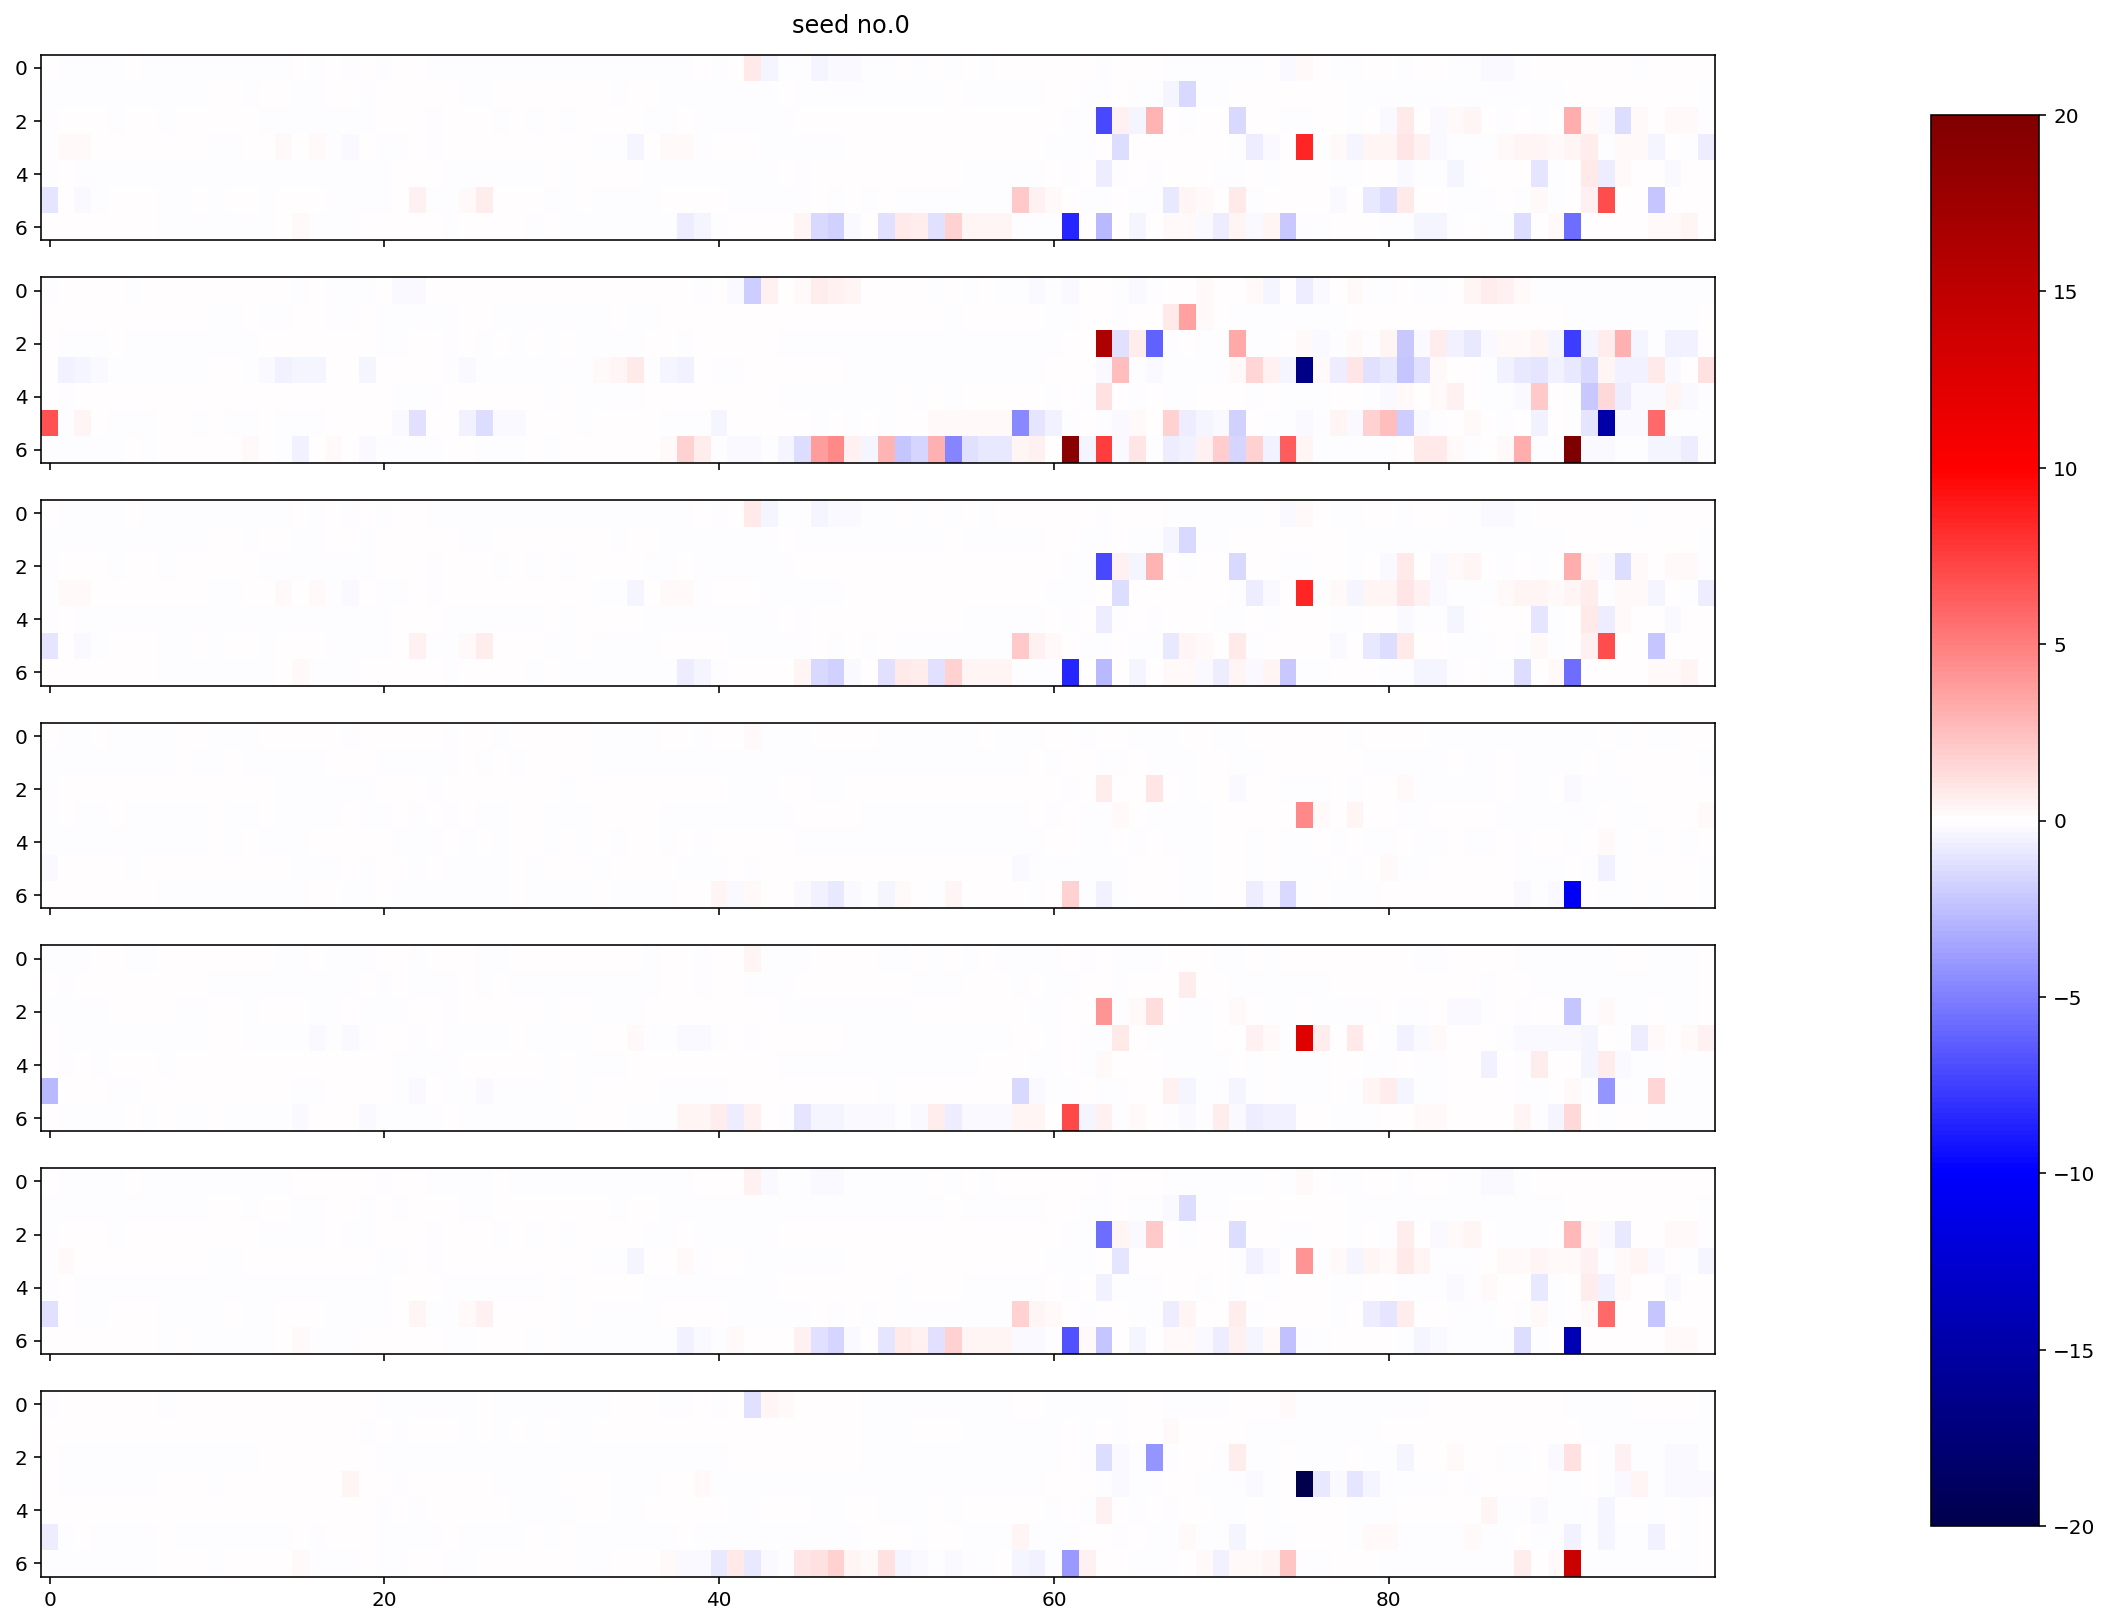

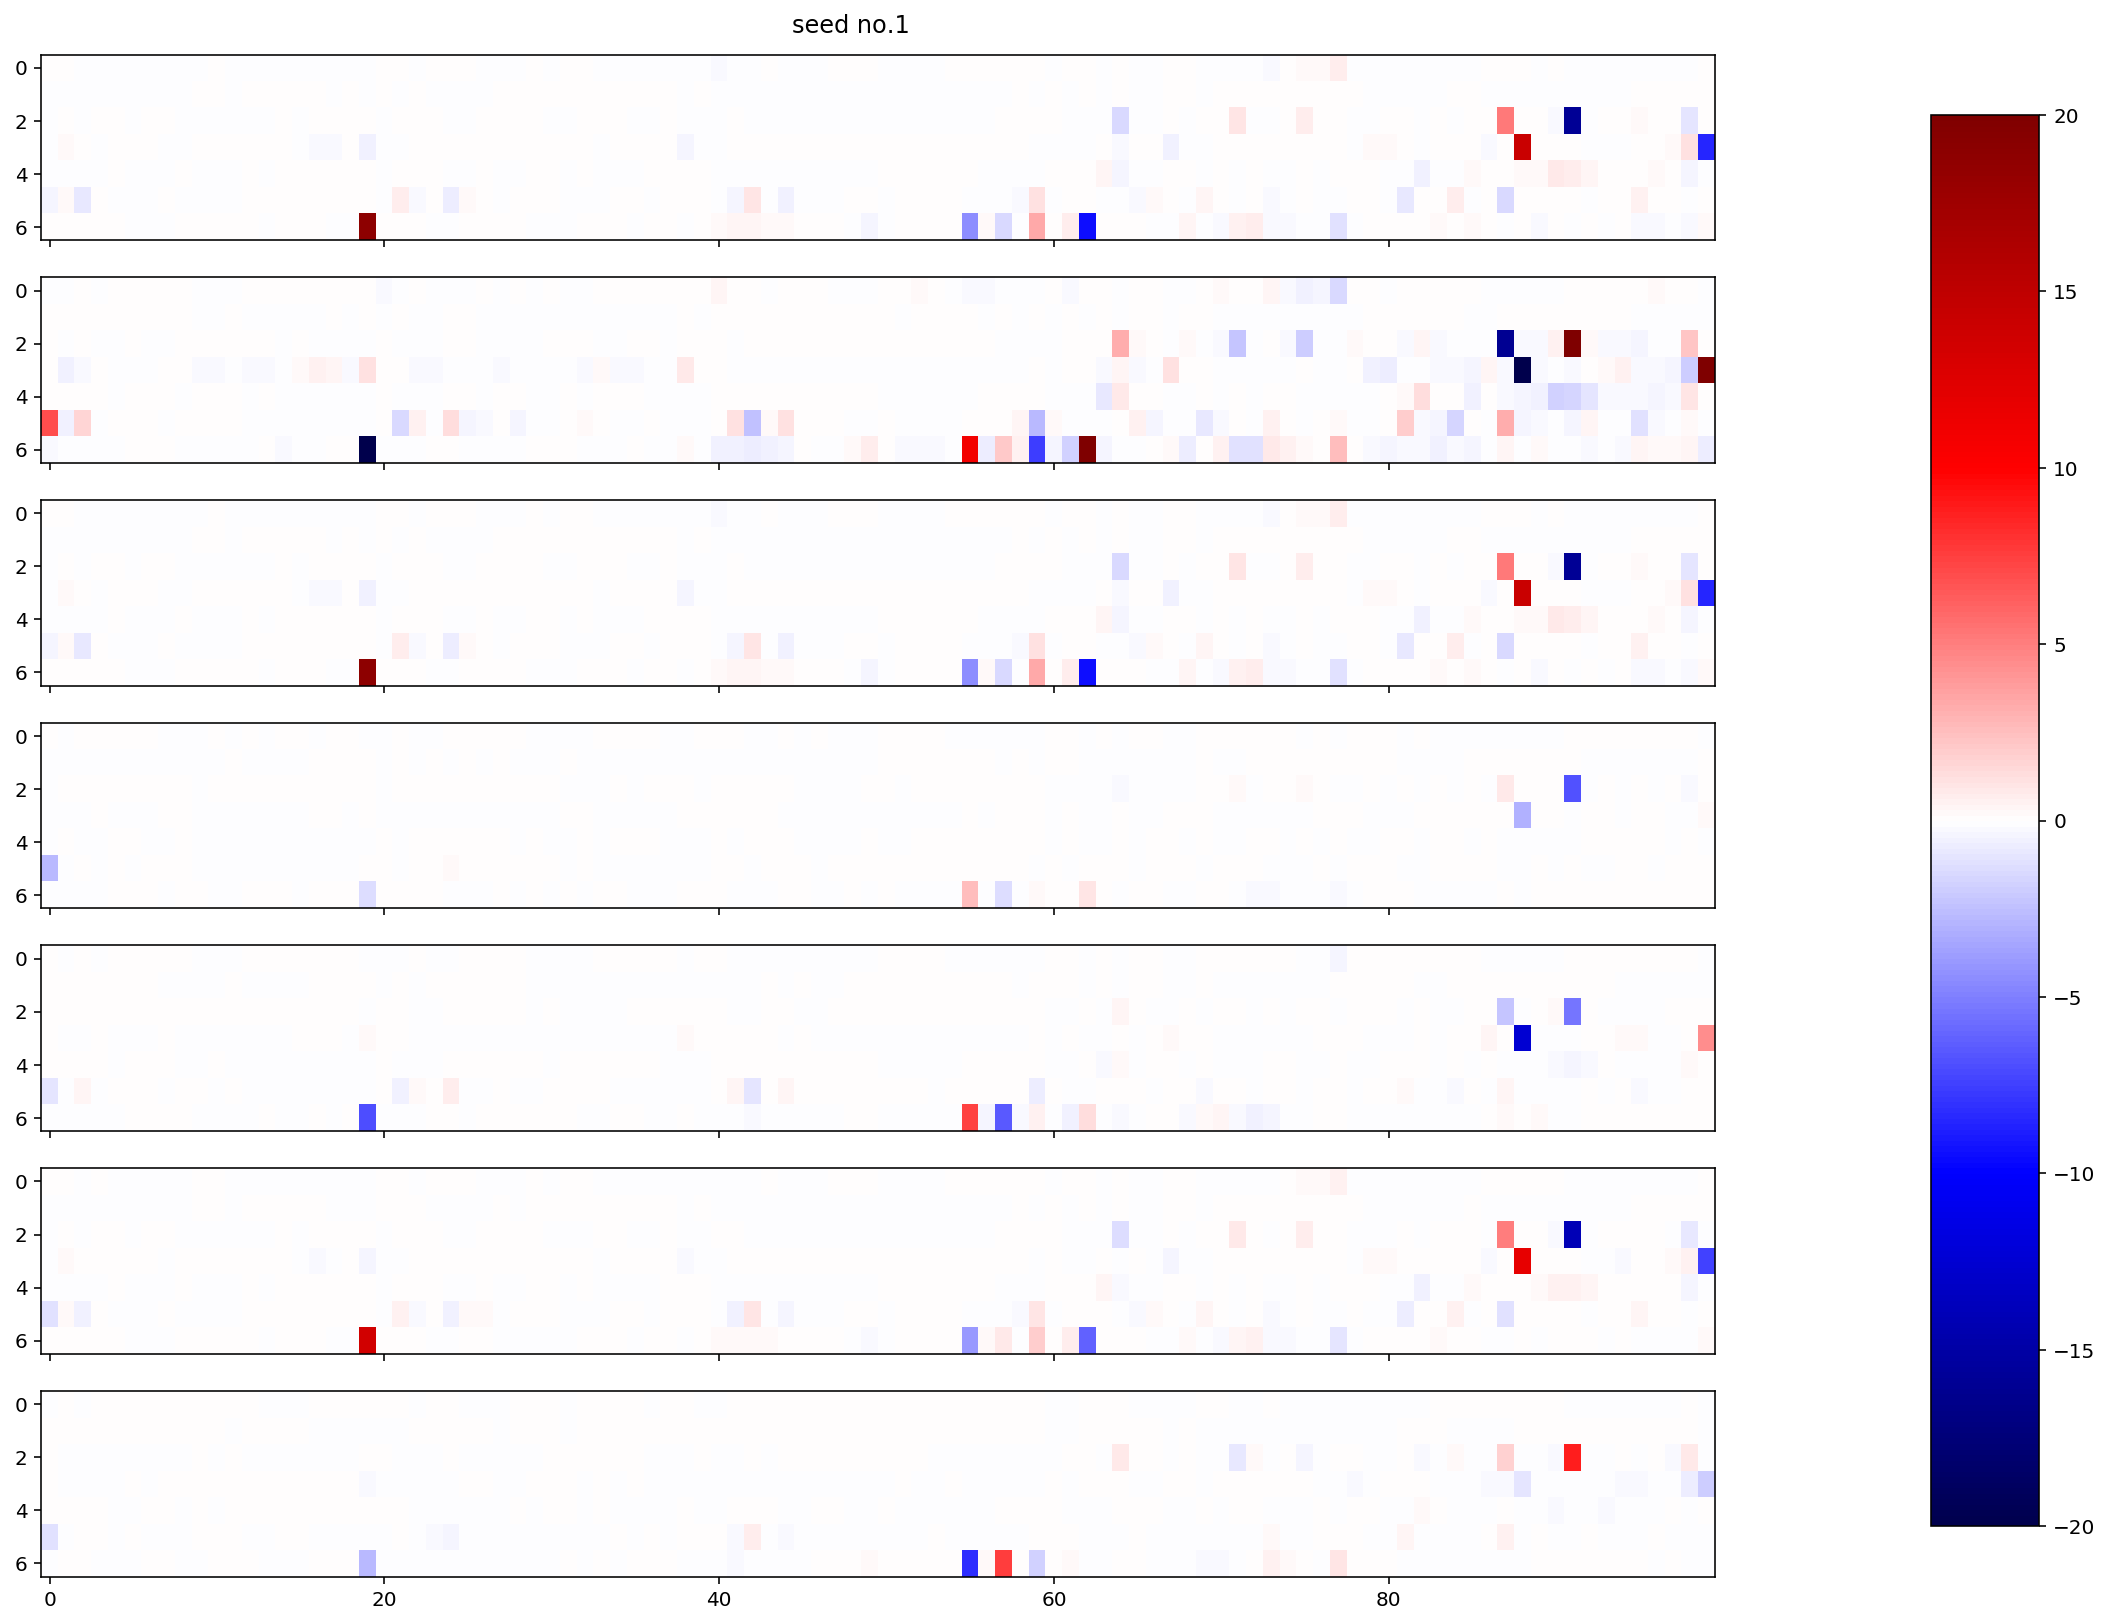

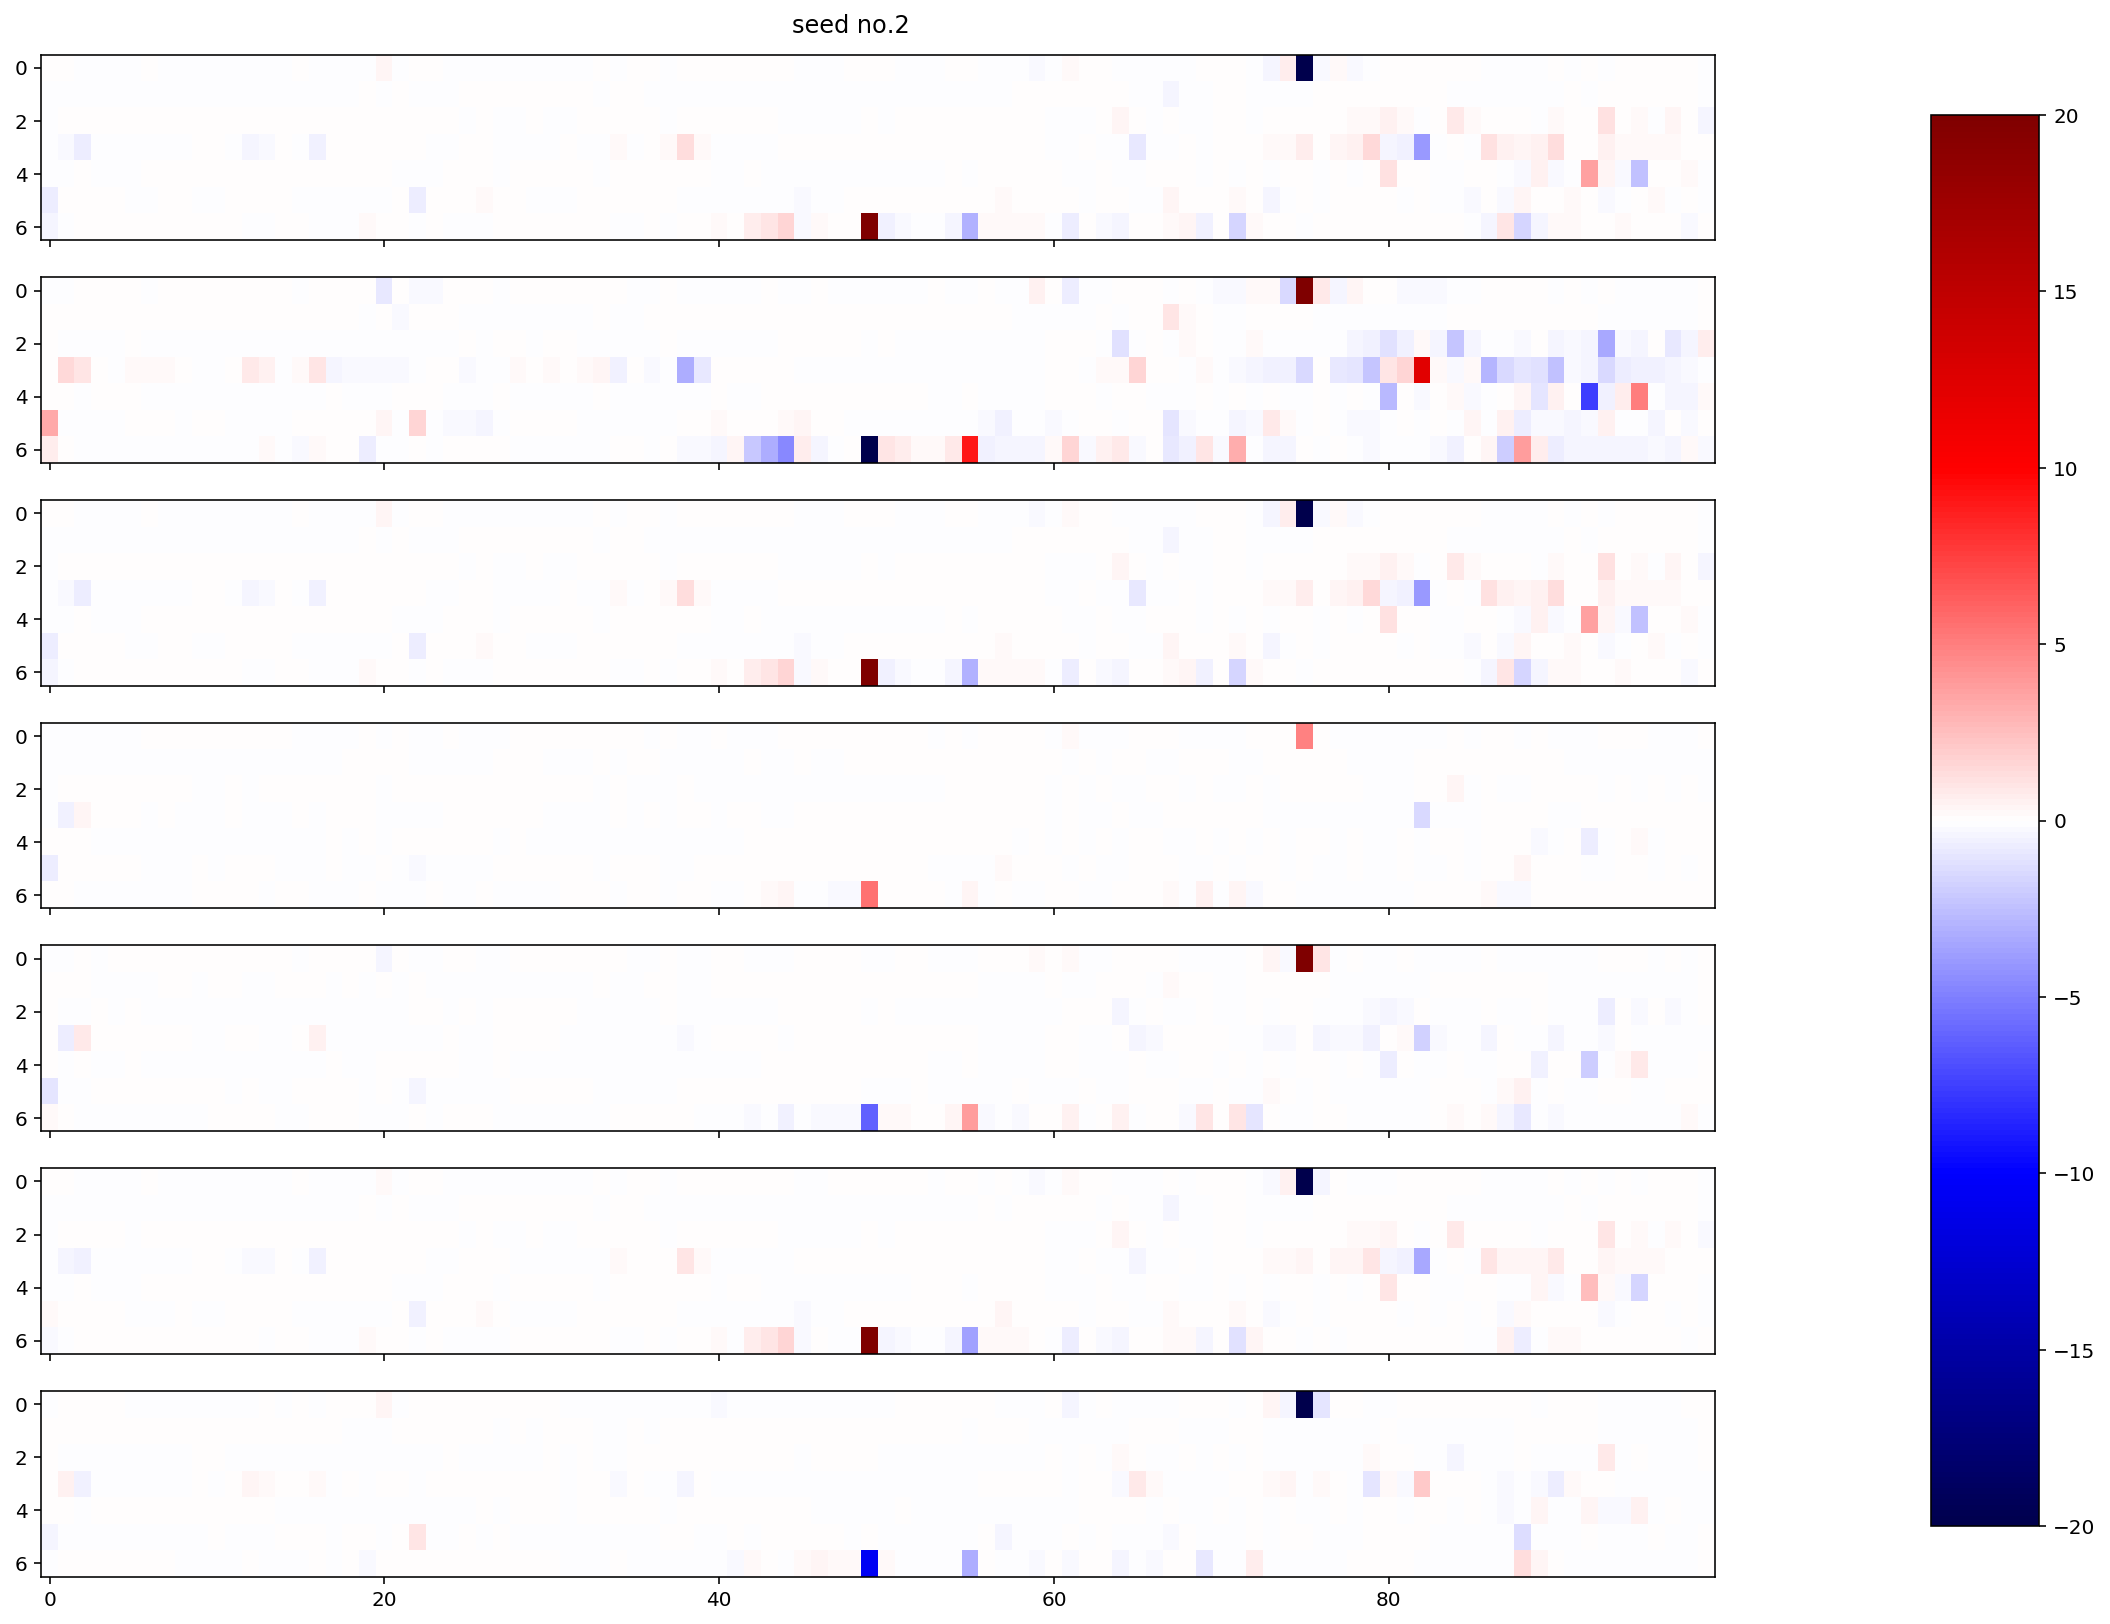

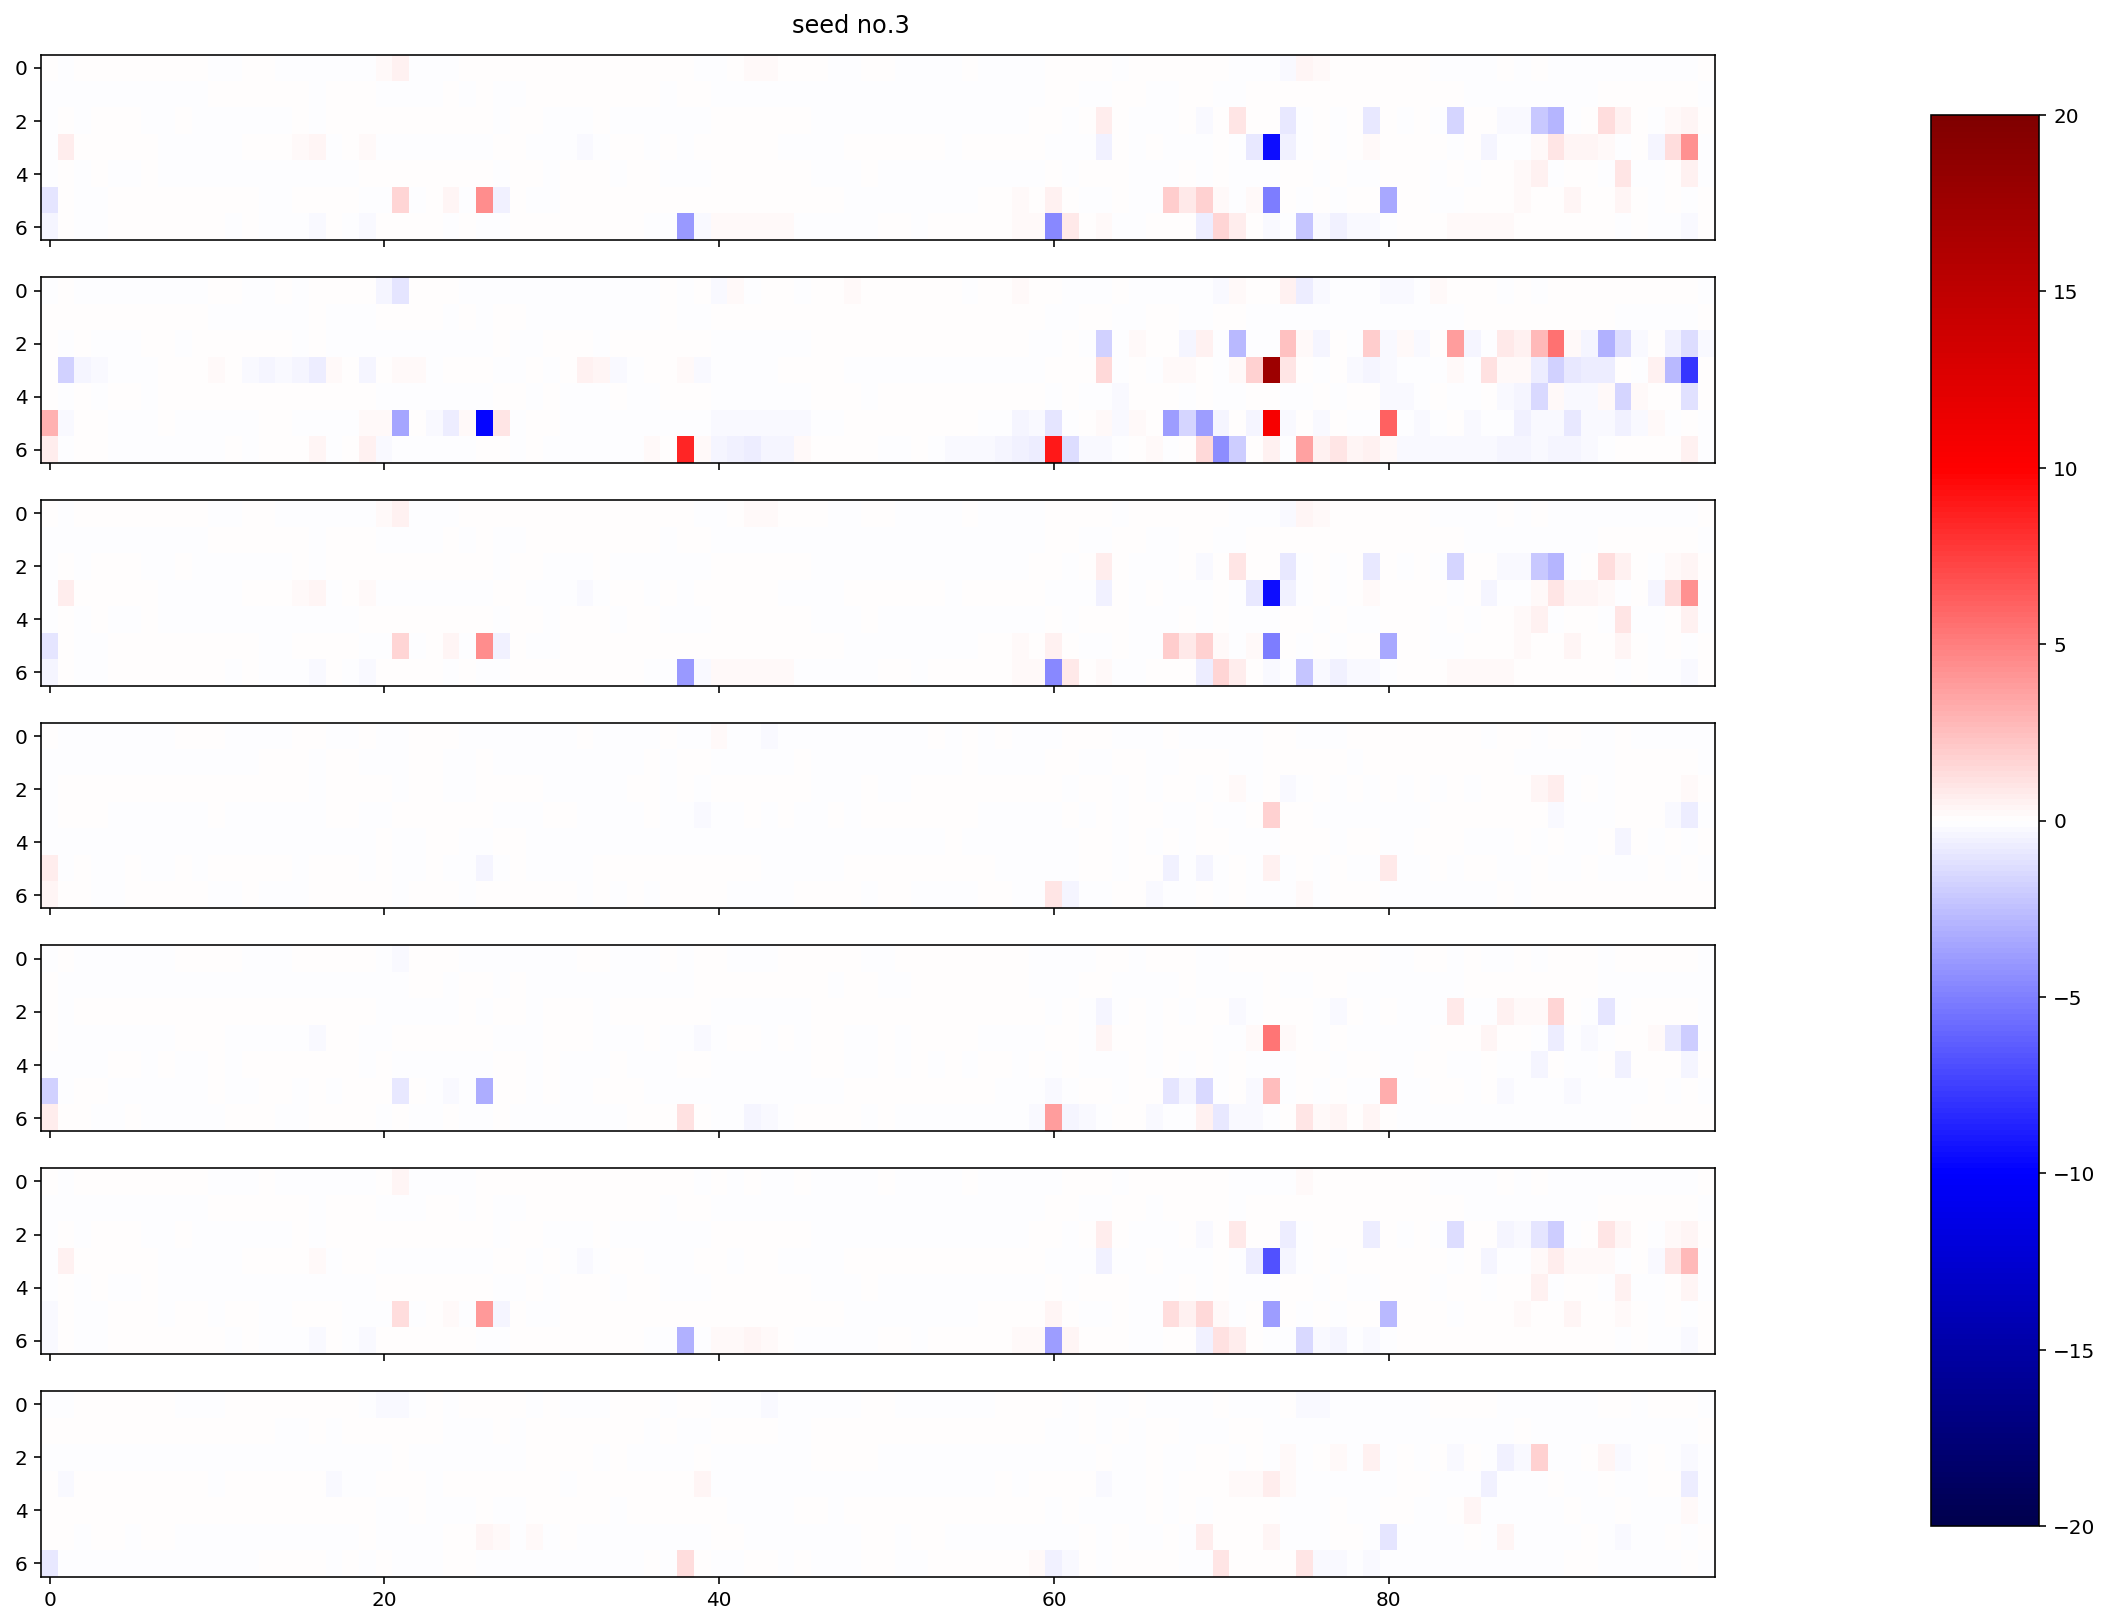

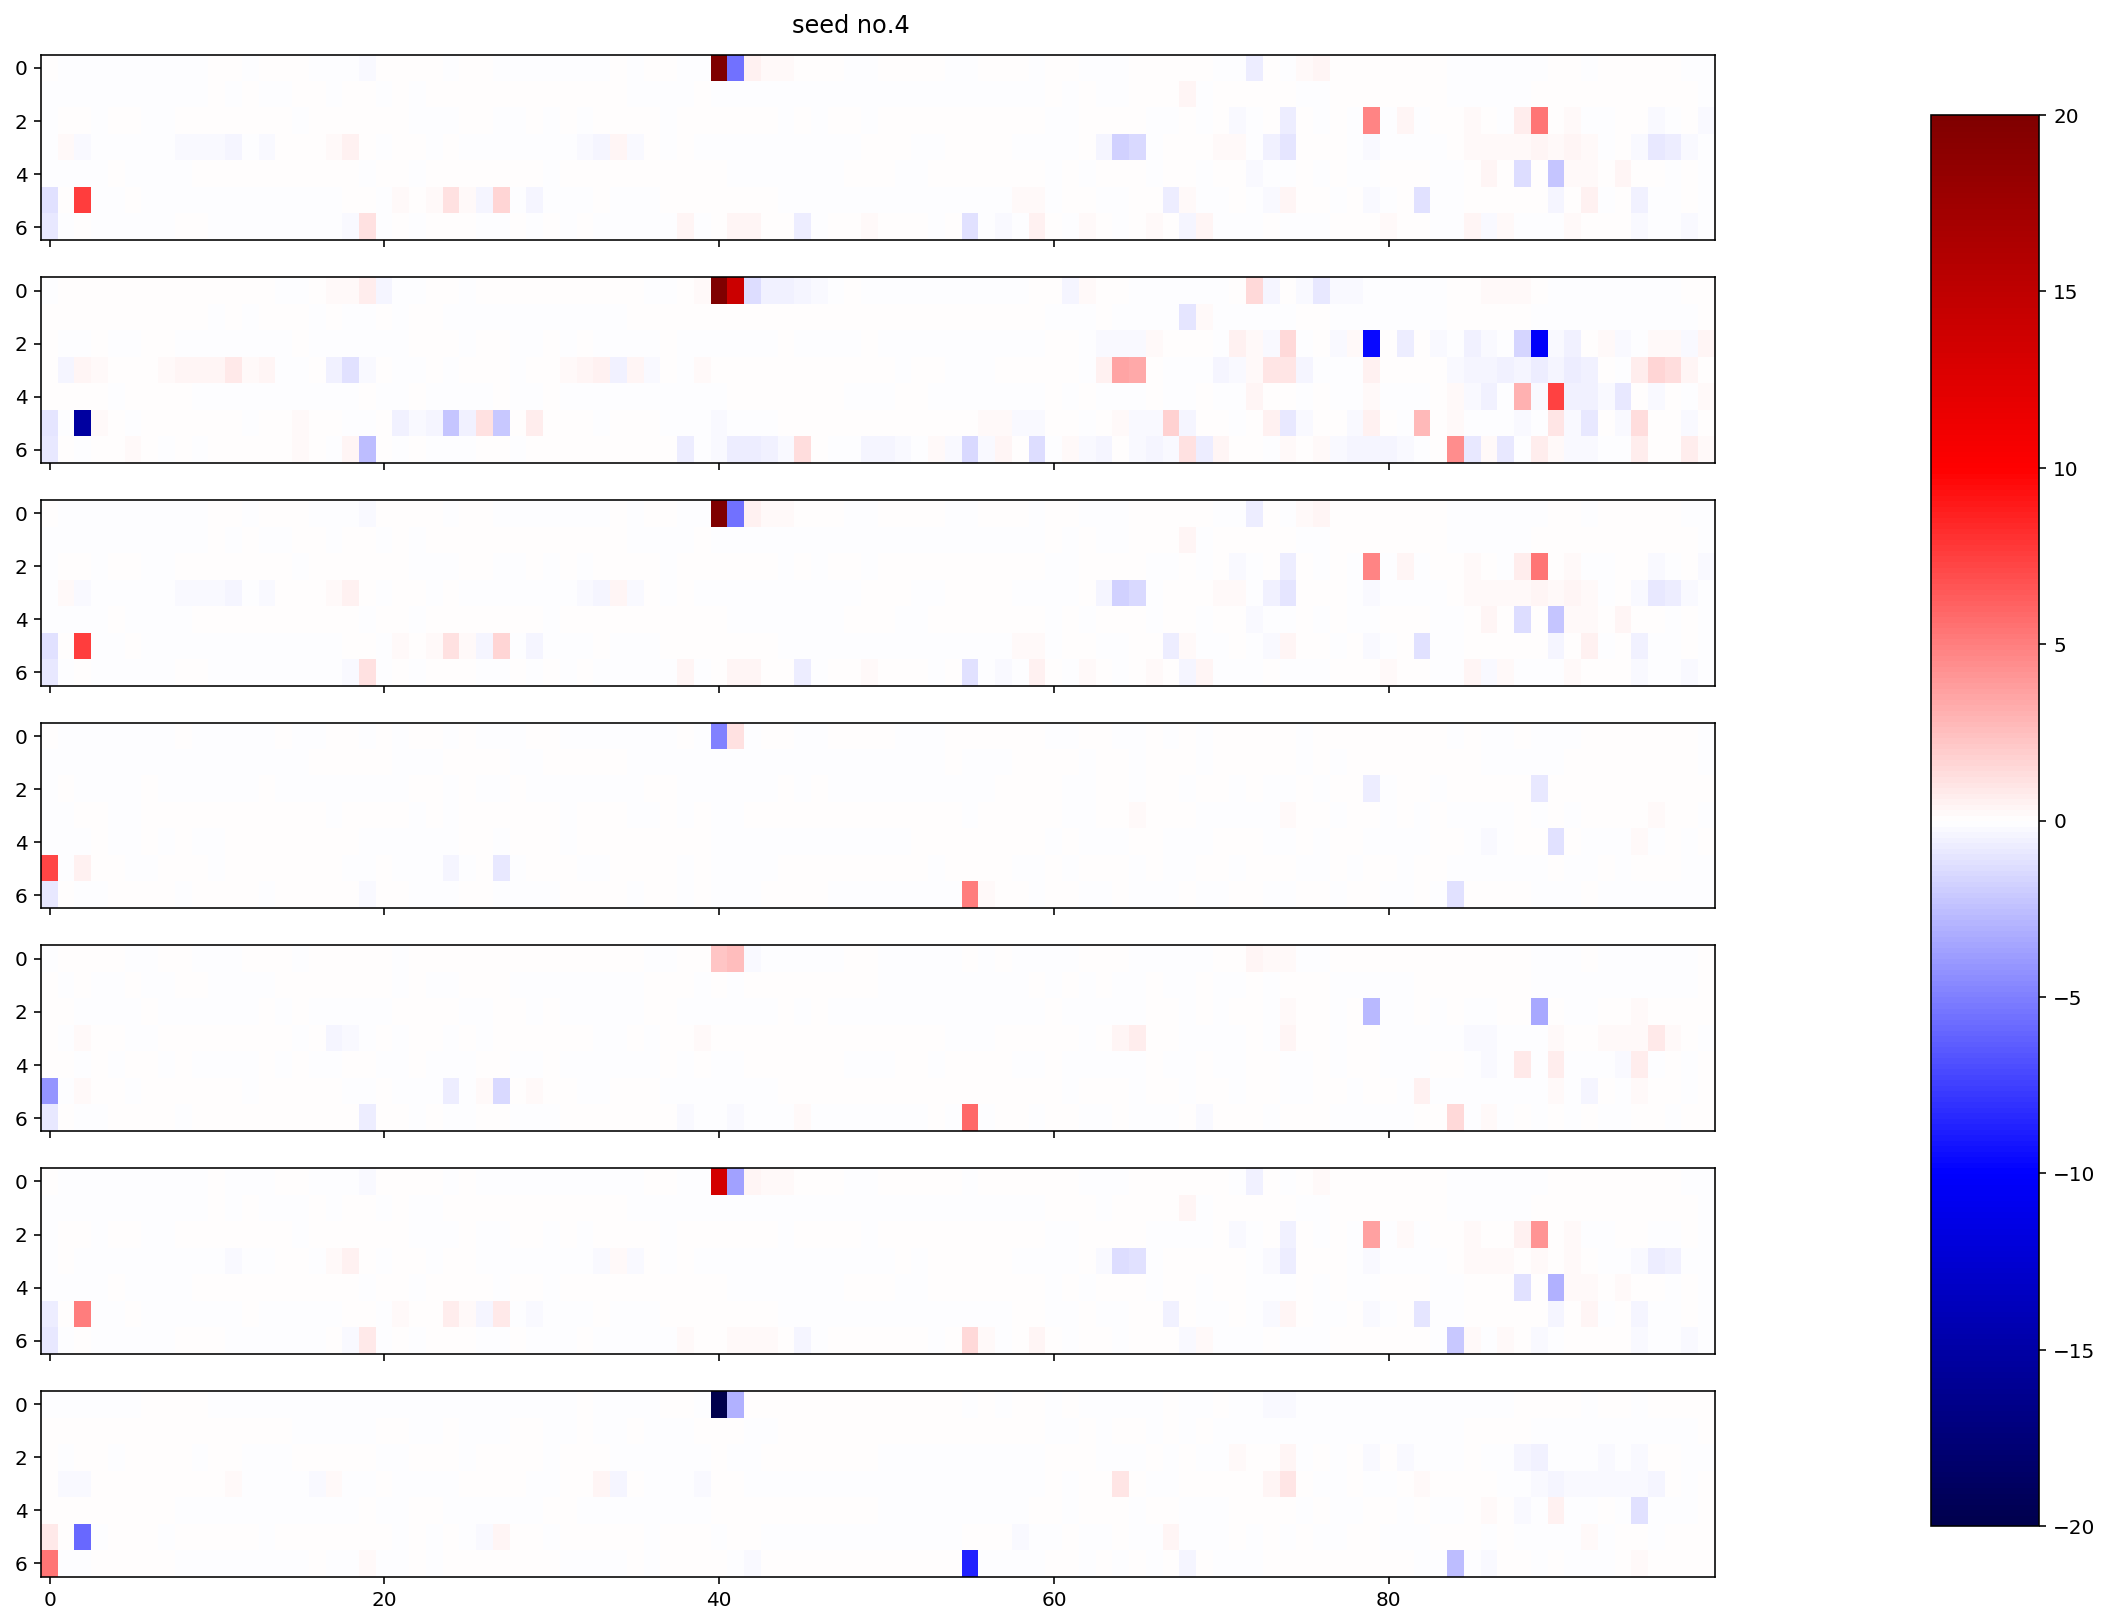

In [94]:
for i in range(5):
    fig, axes = plt.subplots(nrows=7, ncols=1, sharex=True)
    fig.set_figheight(14)
    fig.set_figwidth(15)
    fig.suptitle('seed no.%i'%(i),y=0.9)
    for j,ax in enumerate(axes.flat):
        im = ax.imshow(files[j][names[i]]/means[i]-1,cmap='seismic',vmin=-20,vmax=20,aspect='auto')
    cbar_ax = fig.add_axes([1., 0.15, 0.05, 0.7])
    fig.colorbar(im, cax=cbar_ax)

    plt.show()

#### Triangular weight function seems closest to mean result. 

#### Compare fit from each weight function across seeds.

In [82]:
means_weight = []
for i in range(7):
    mean = 0
    for name in names:
        mean += files[i][name]
    mean /= 5
    means_weight.append(mean)

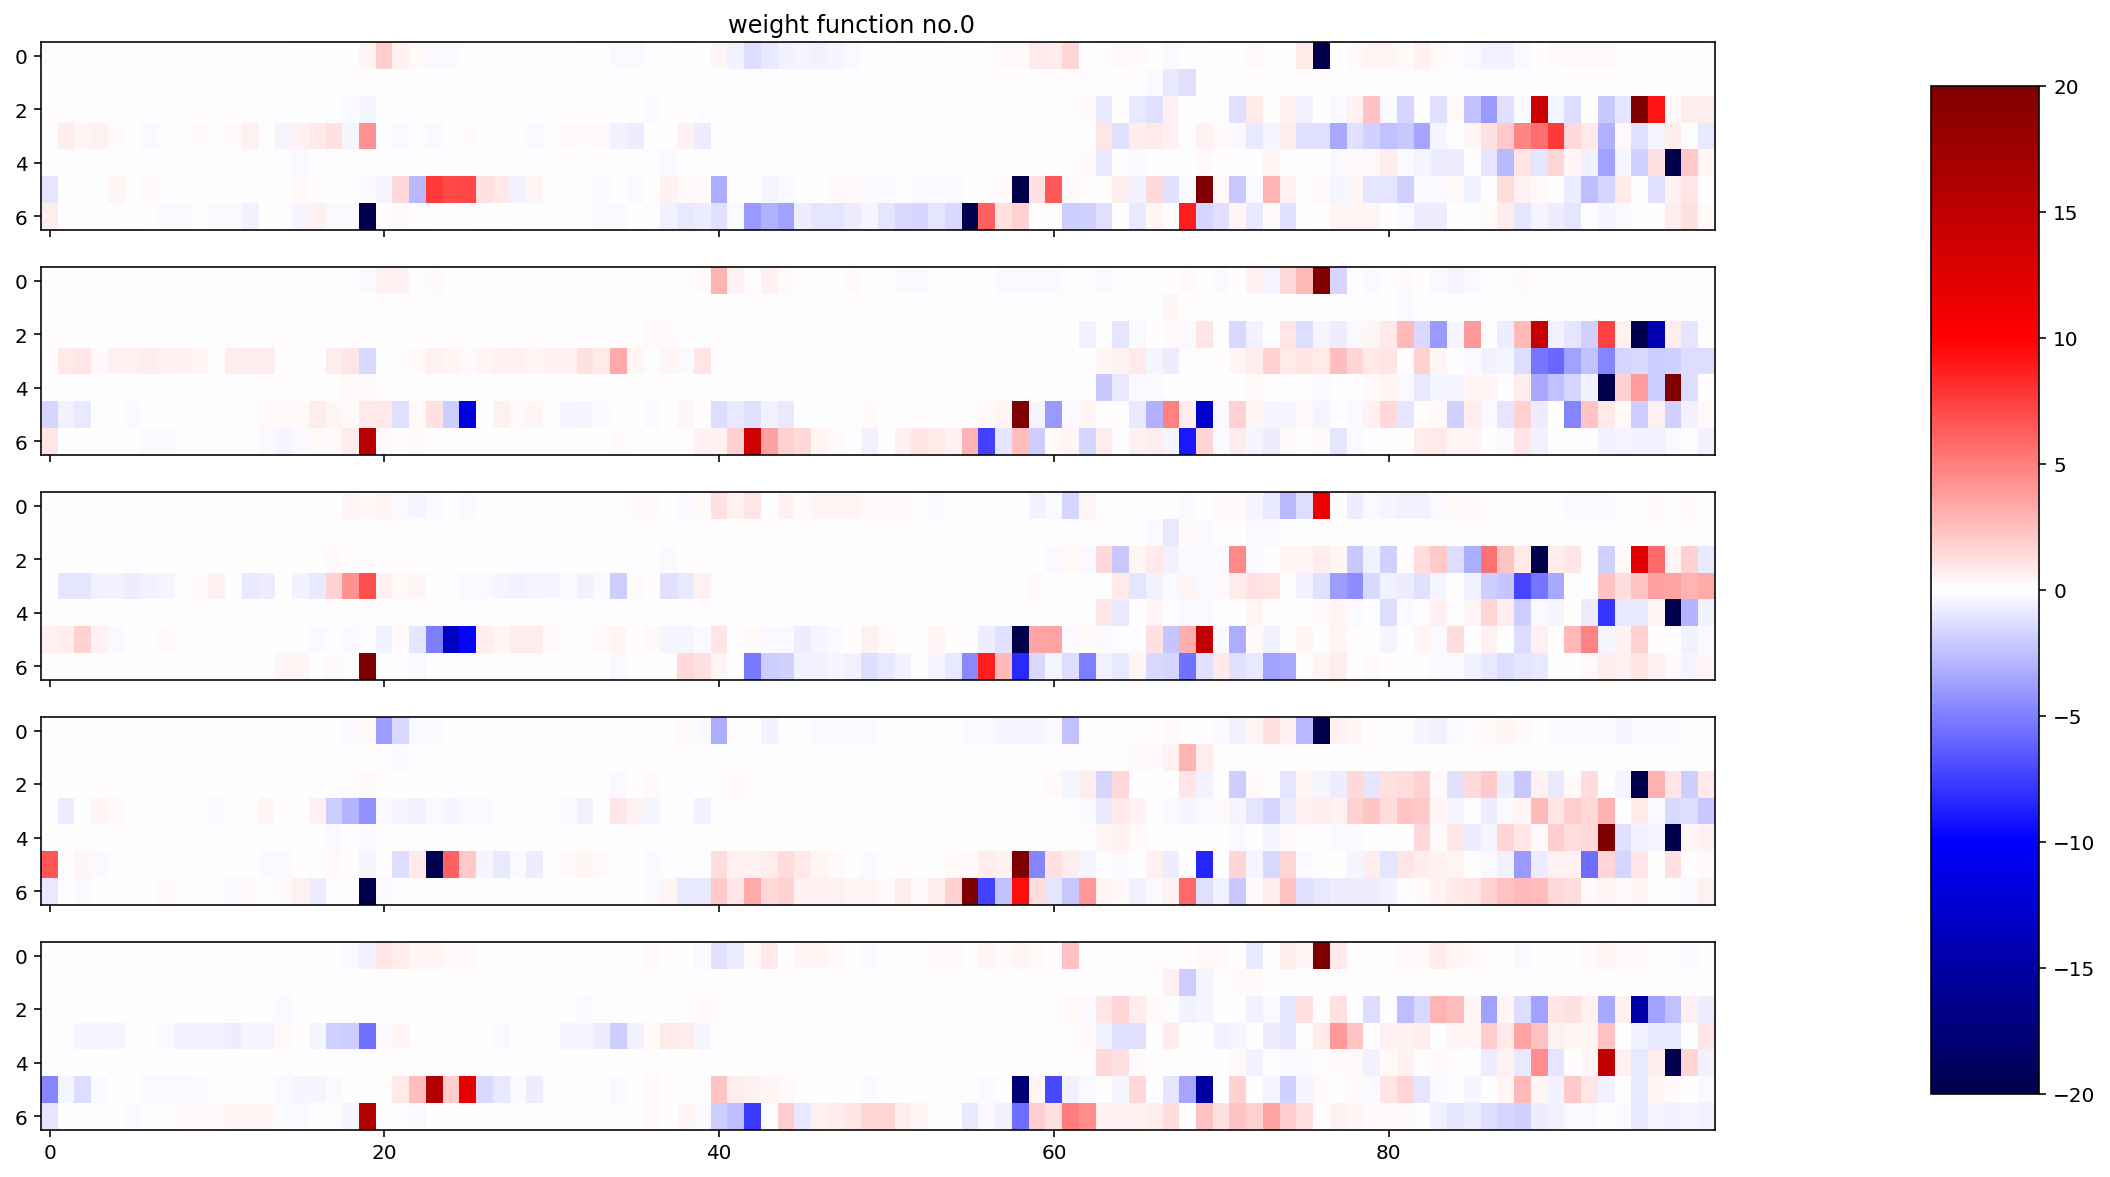

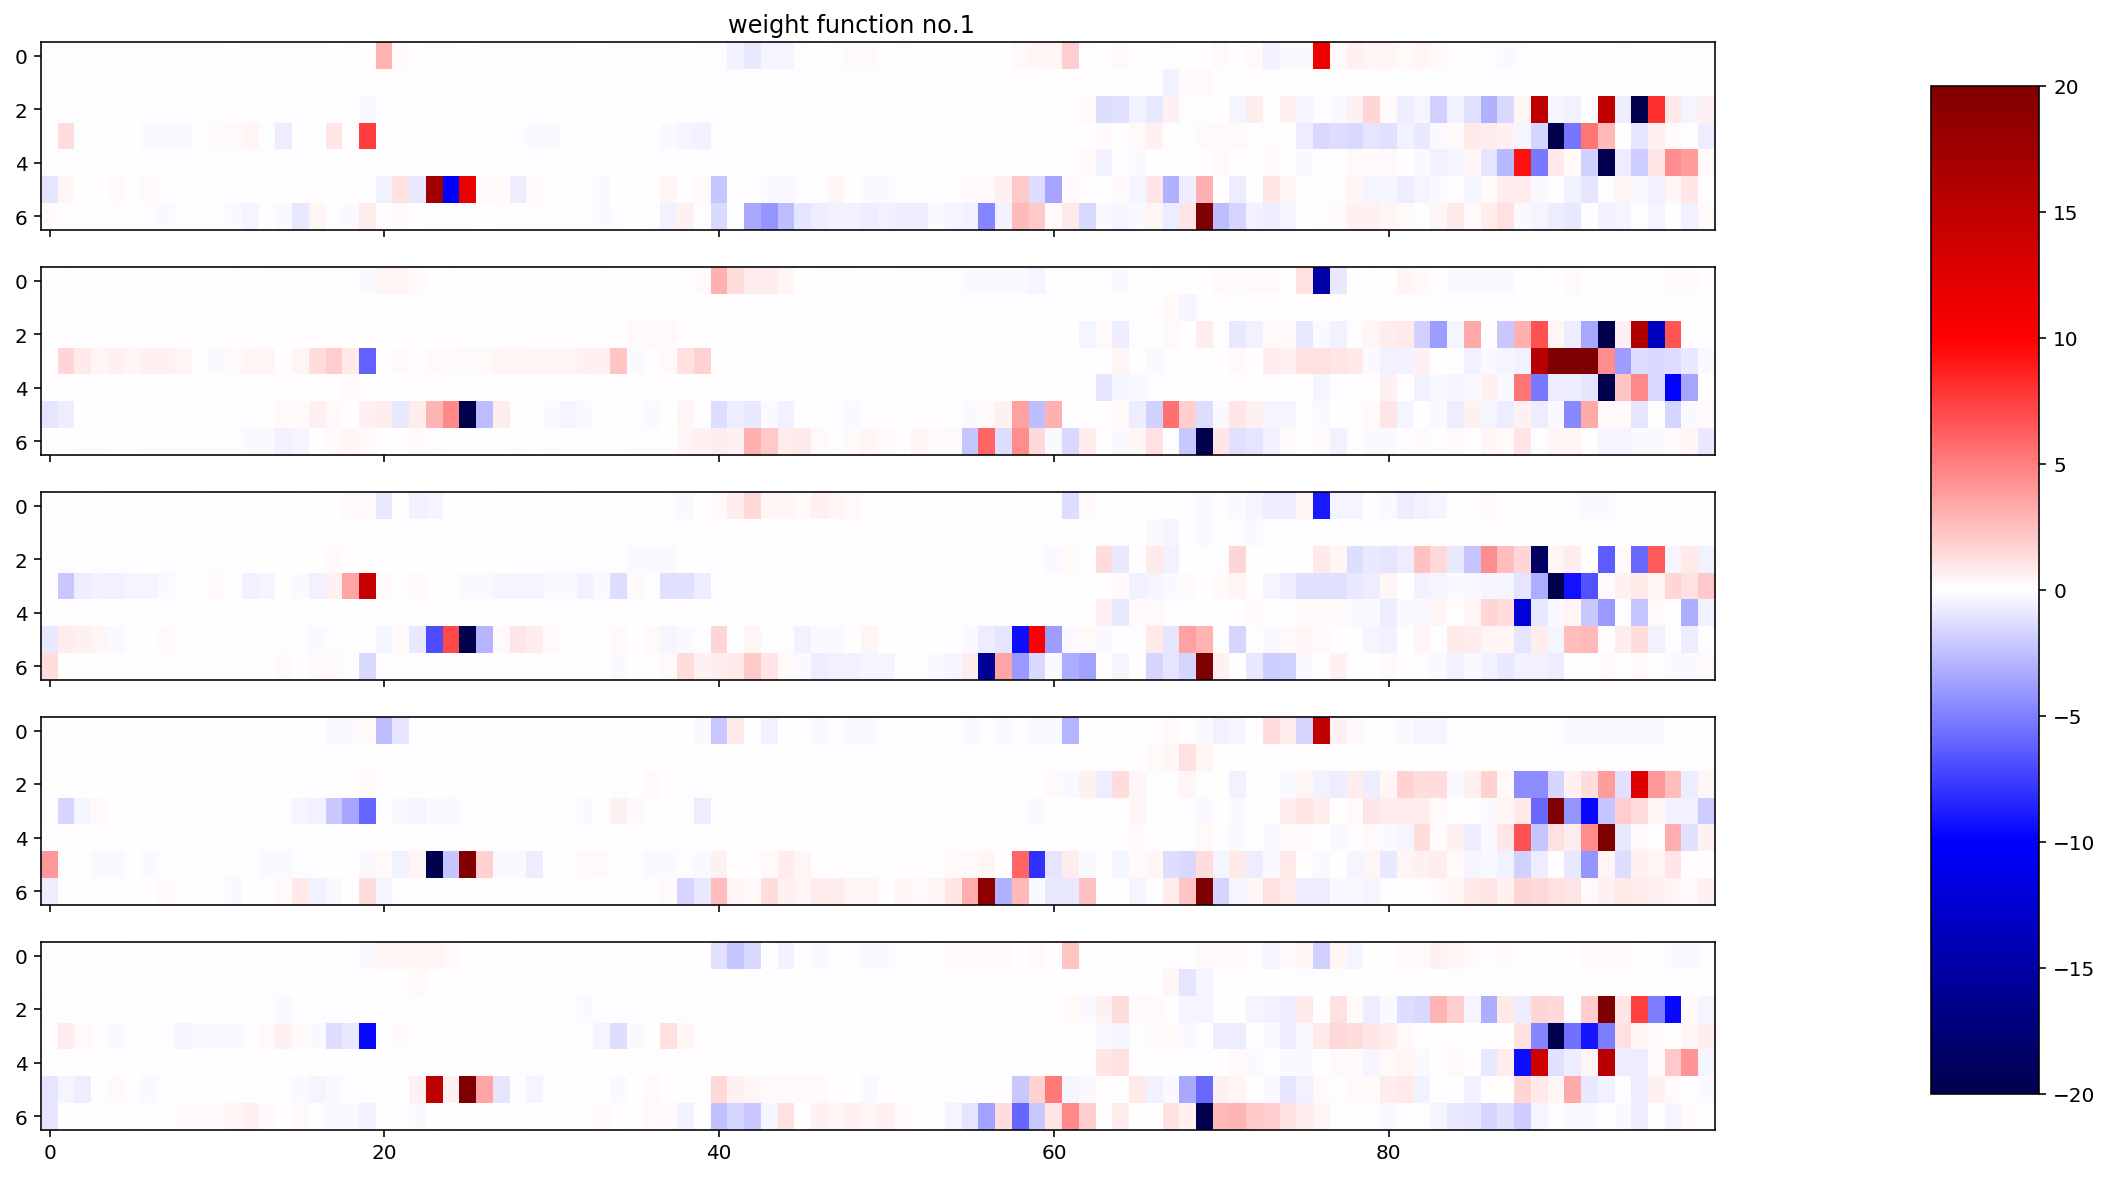

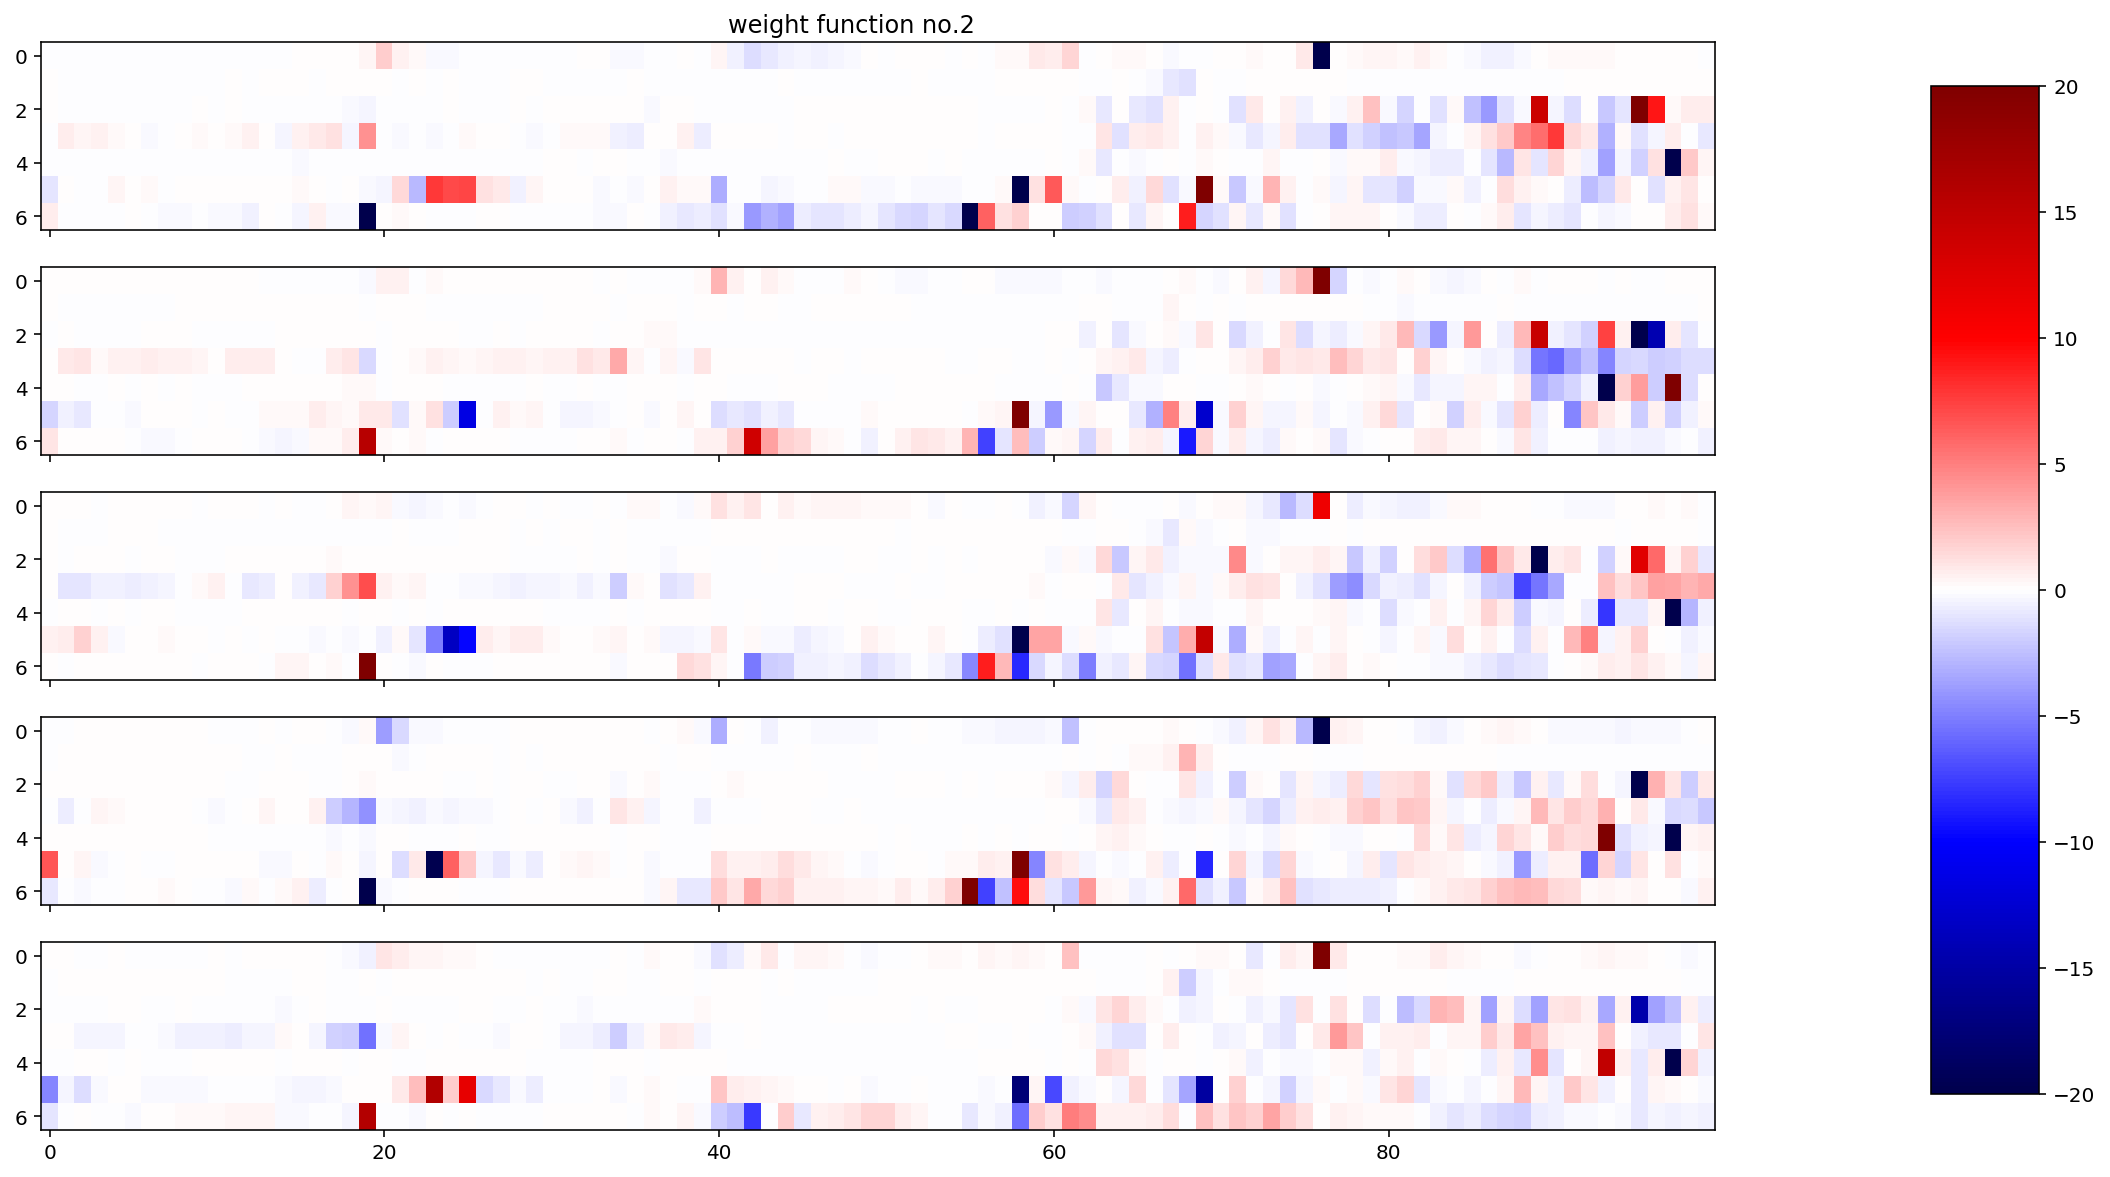

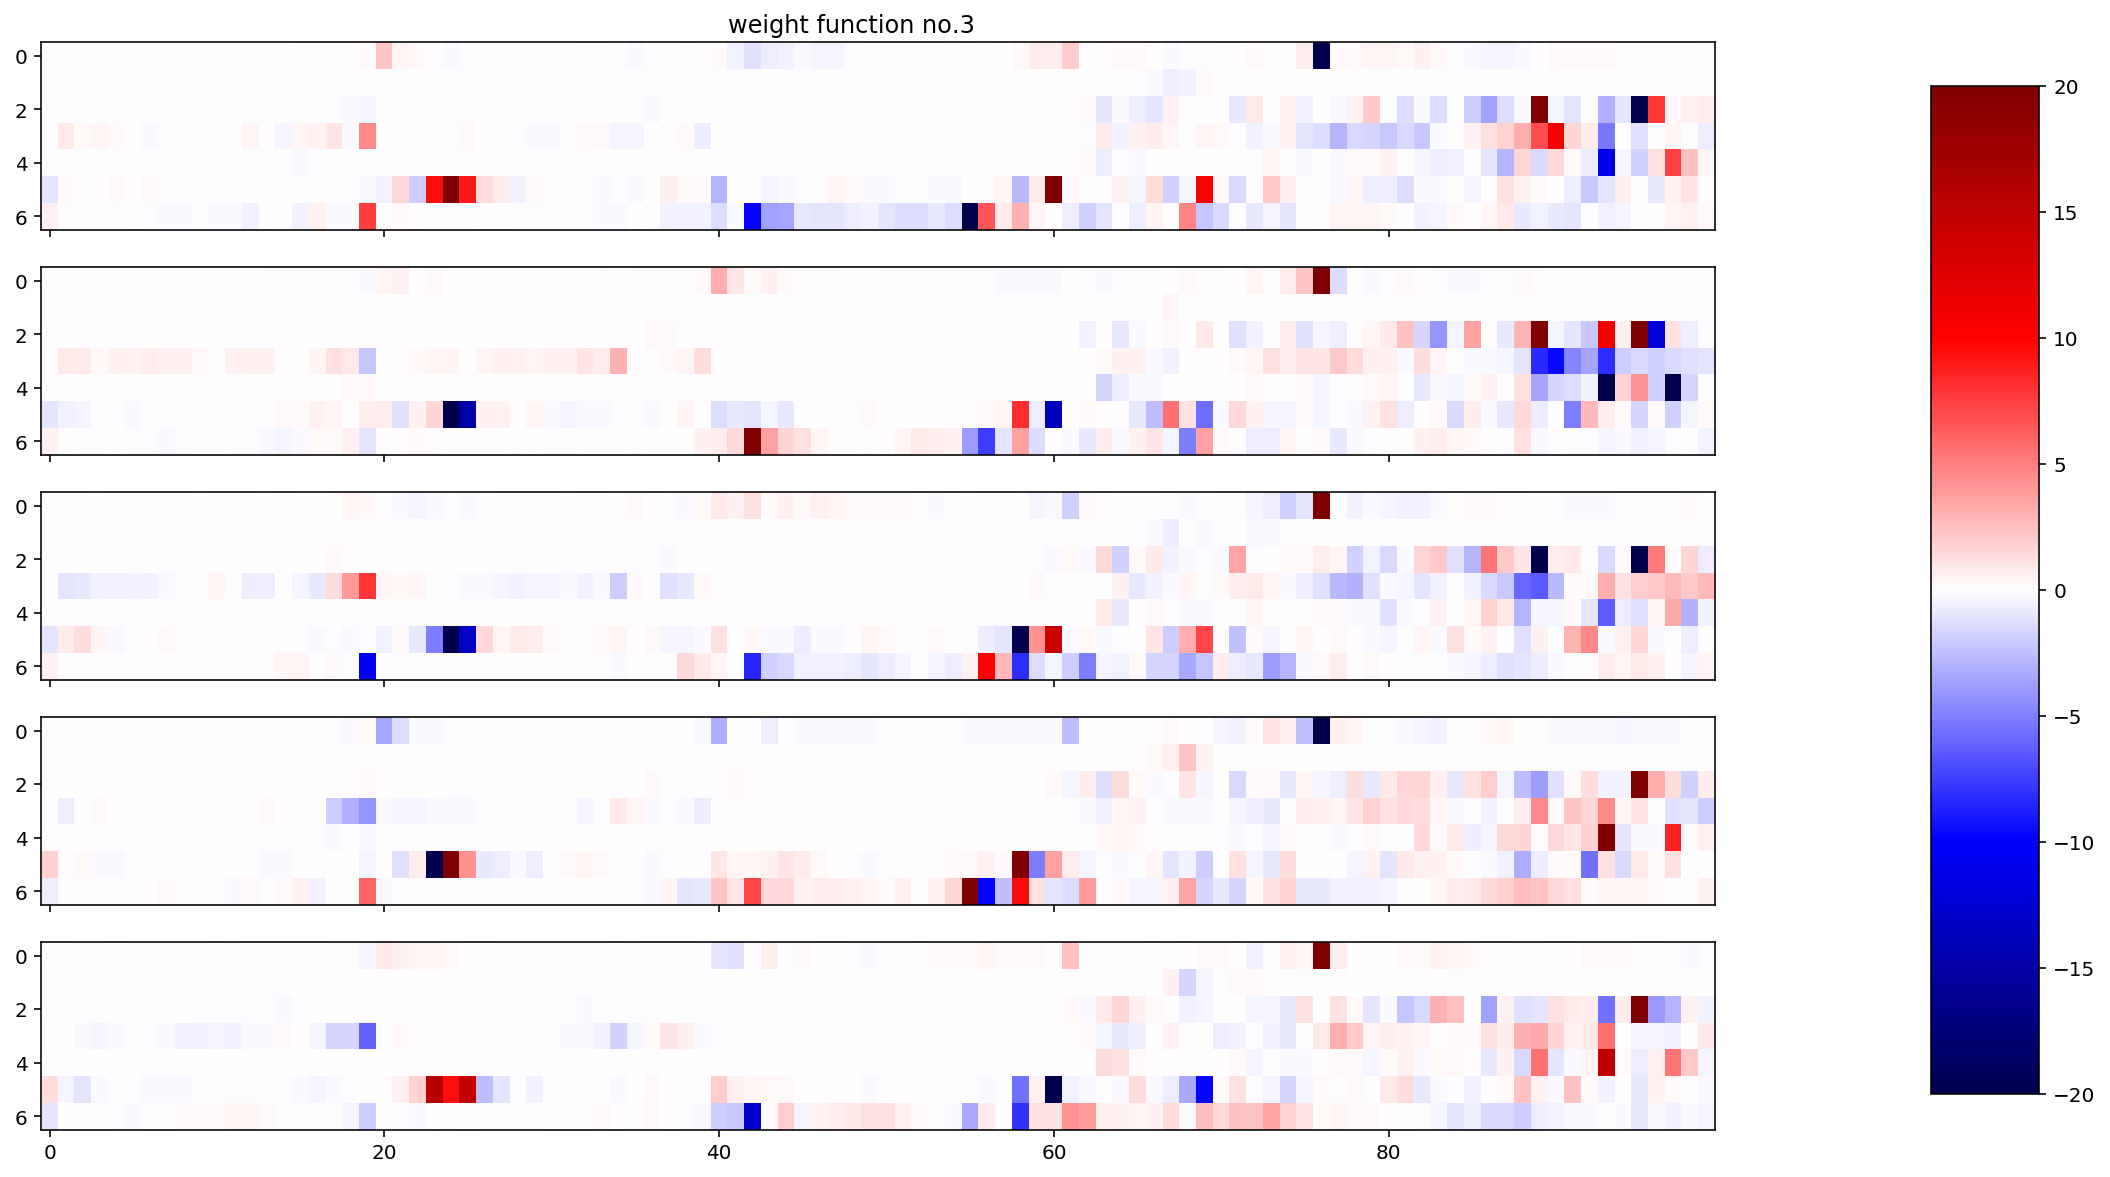

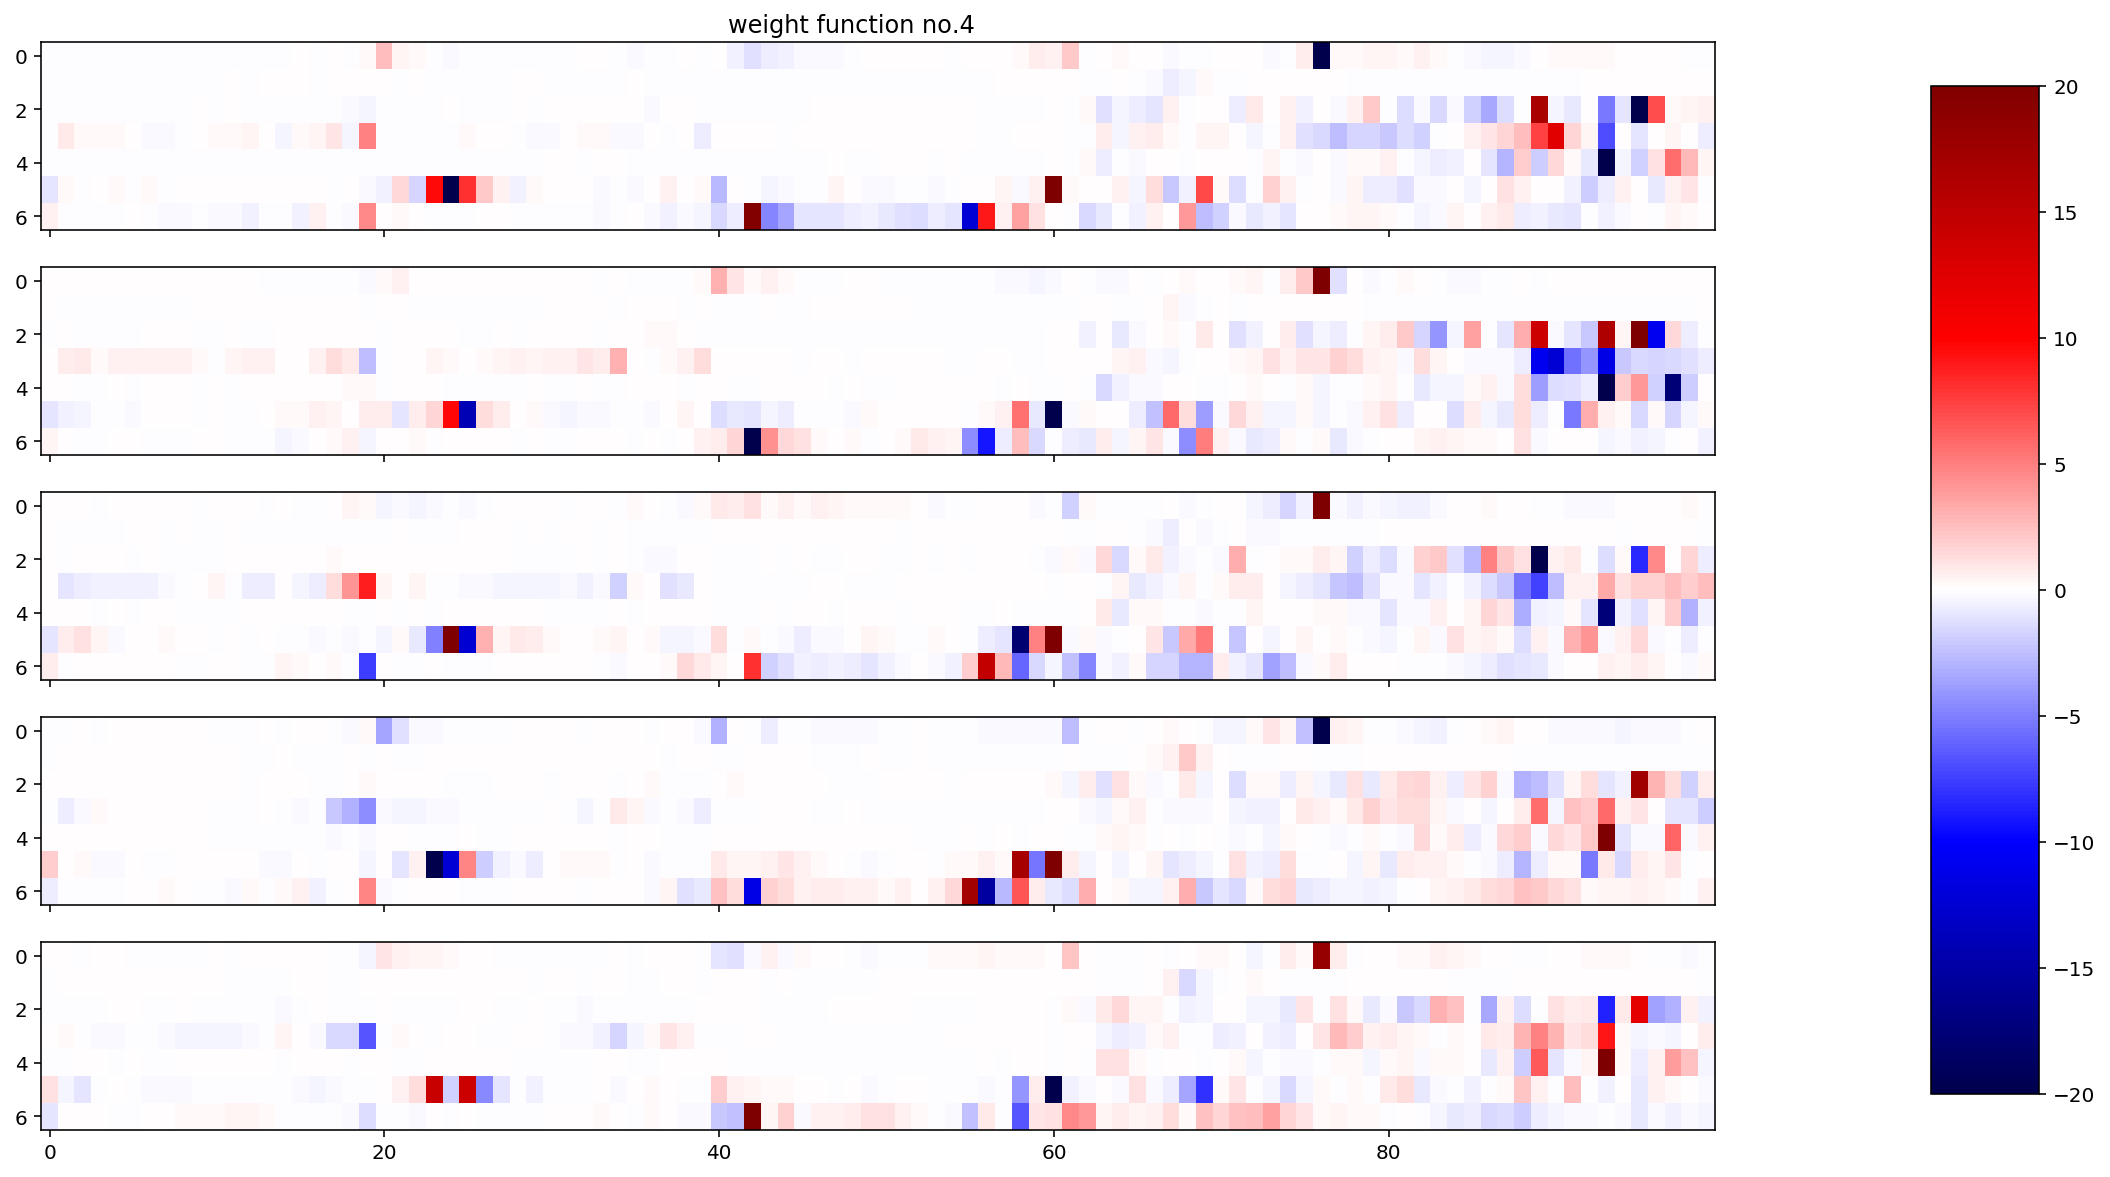

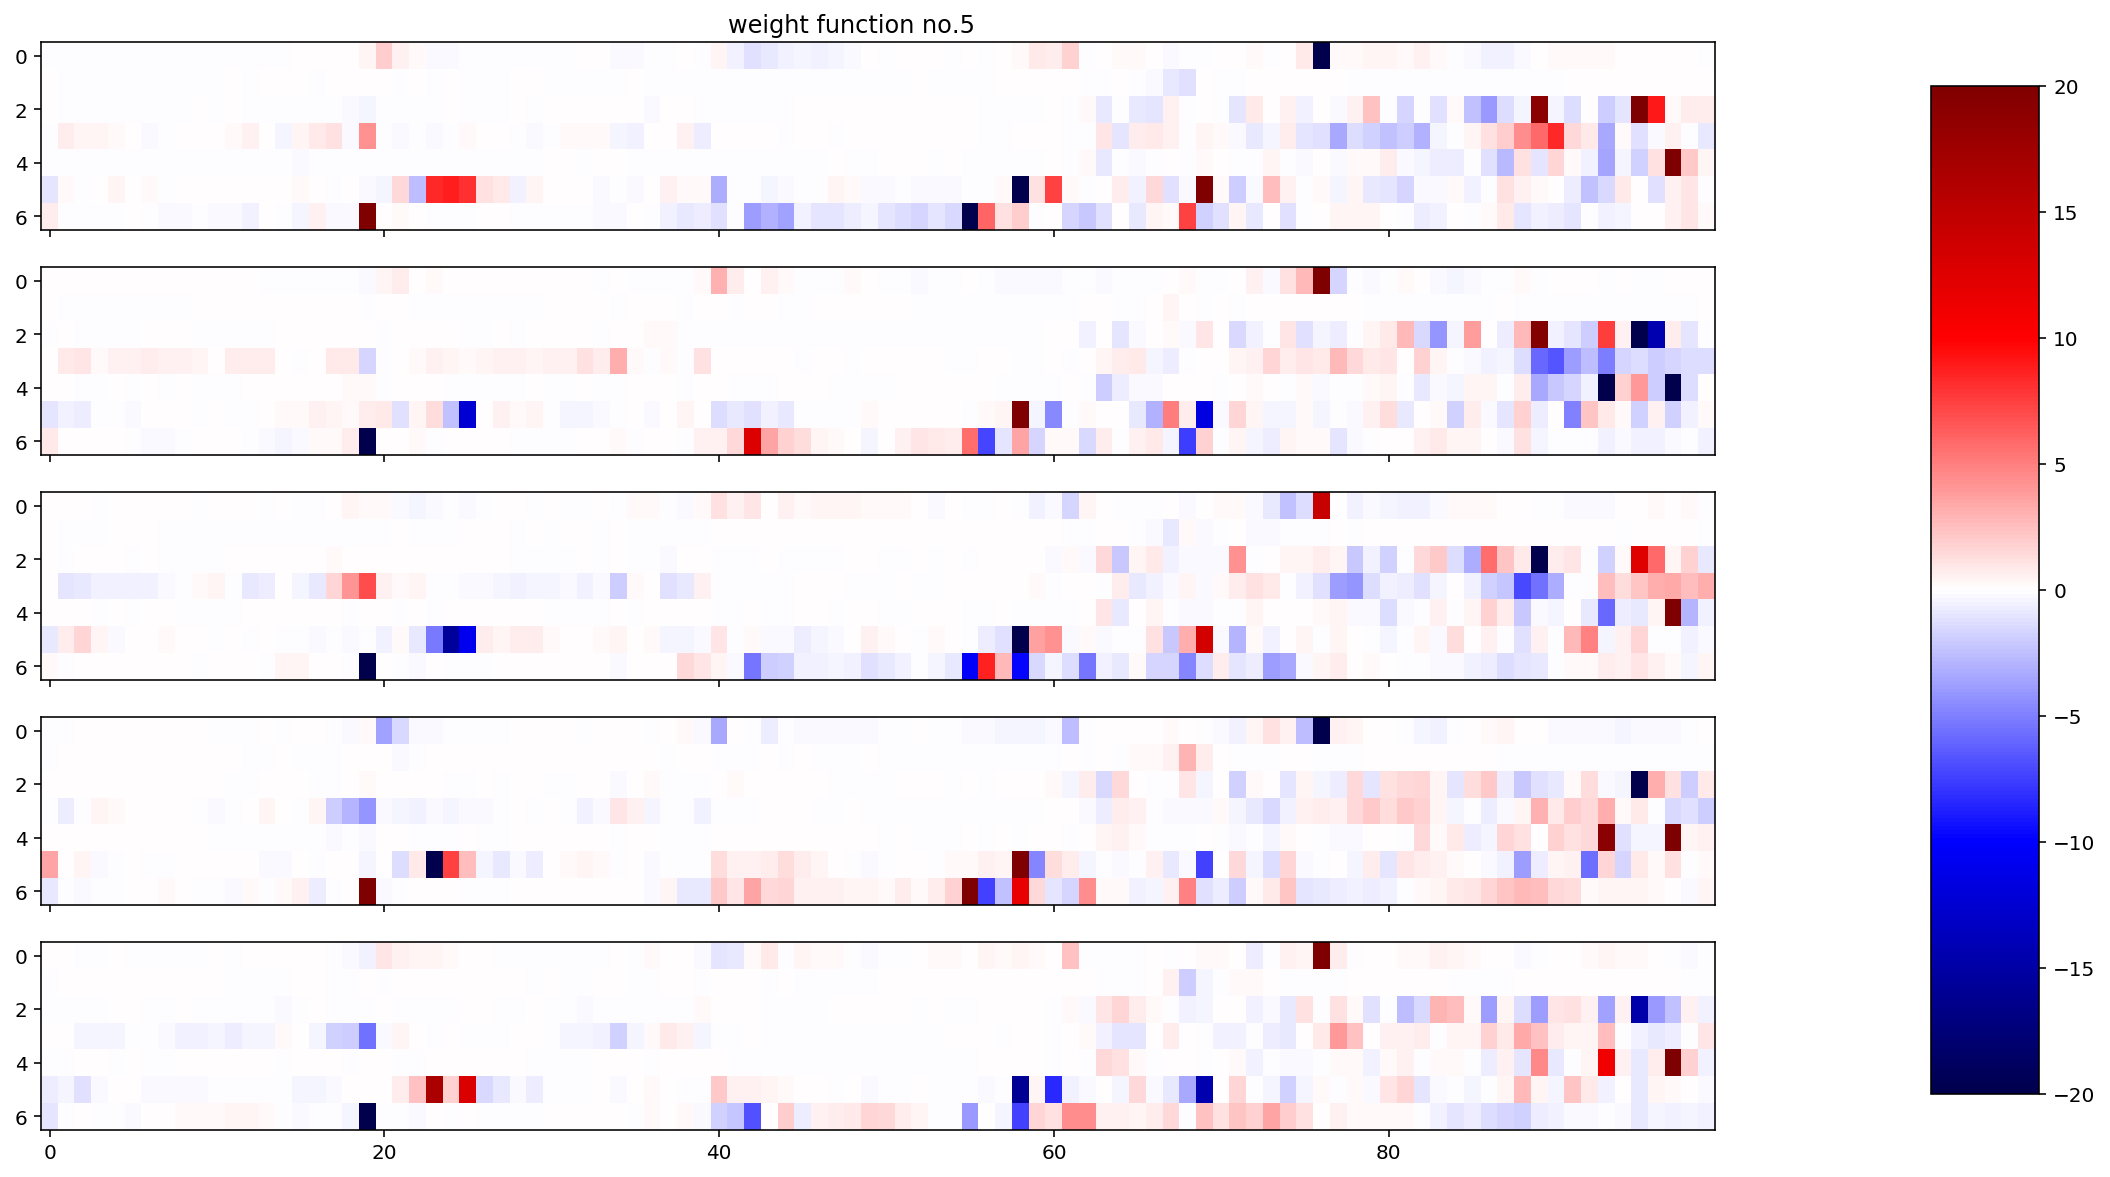

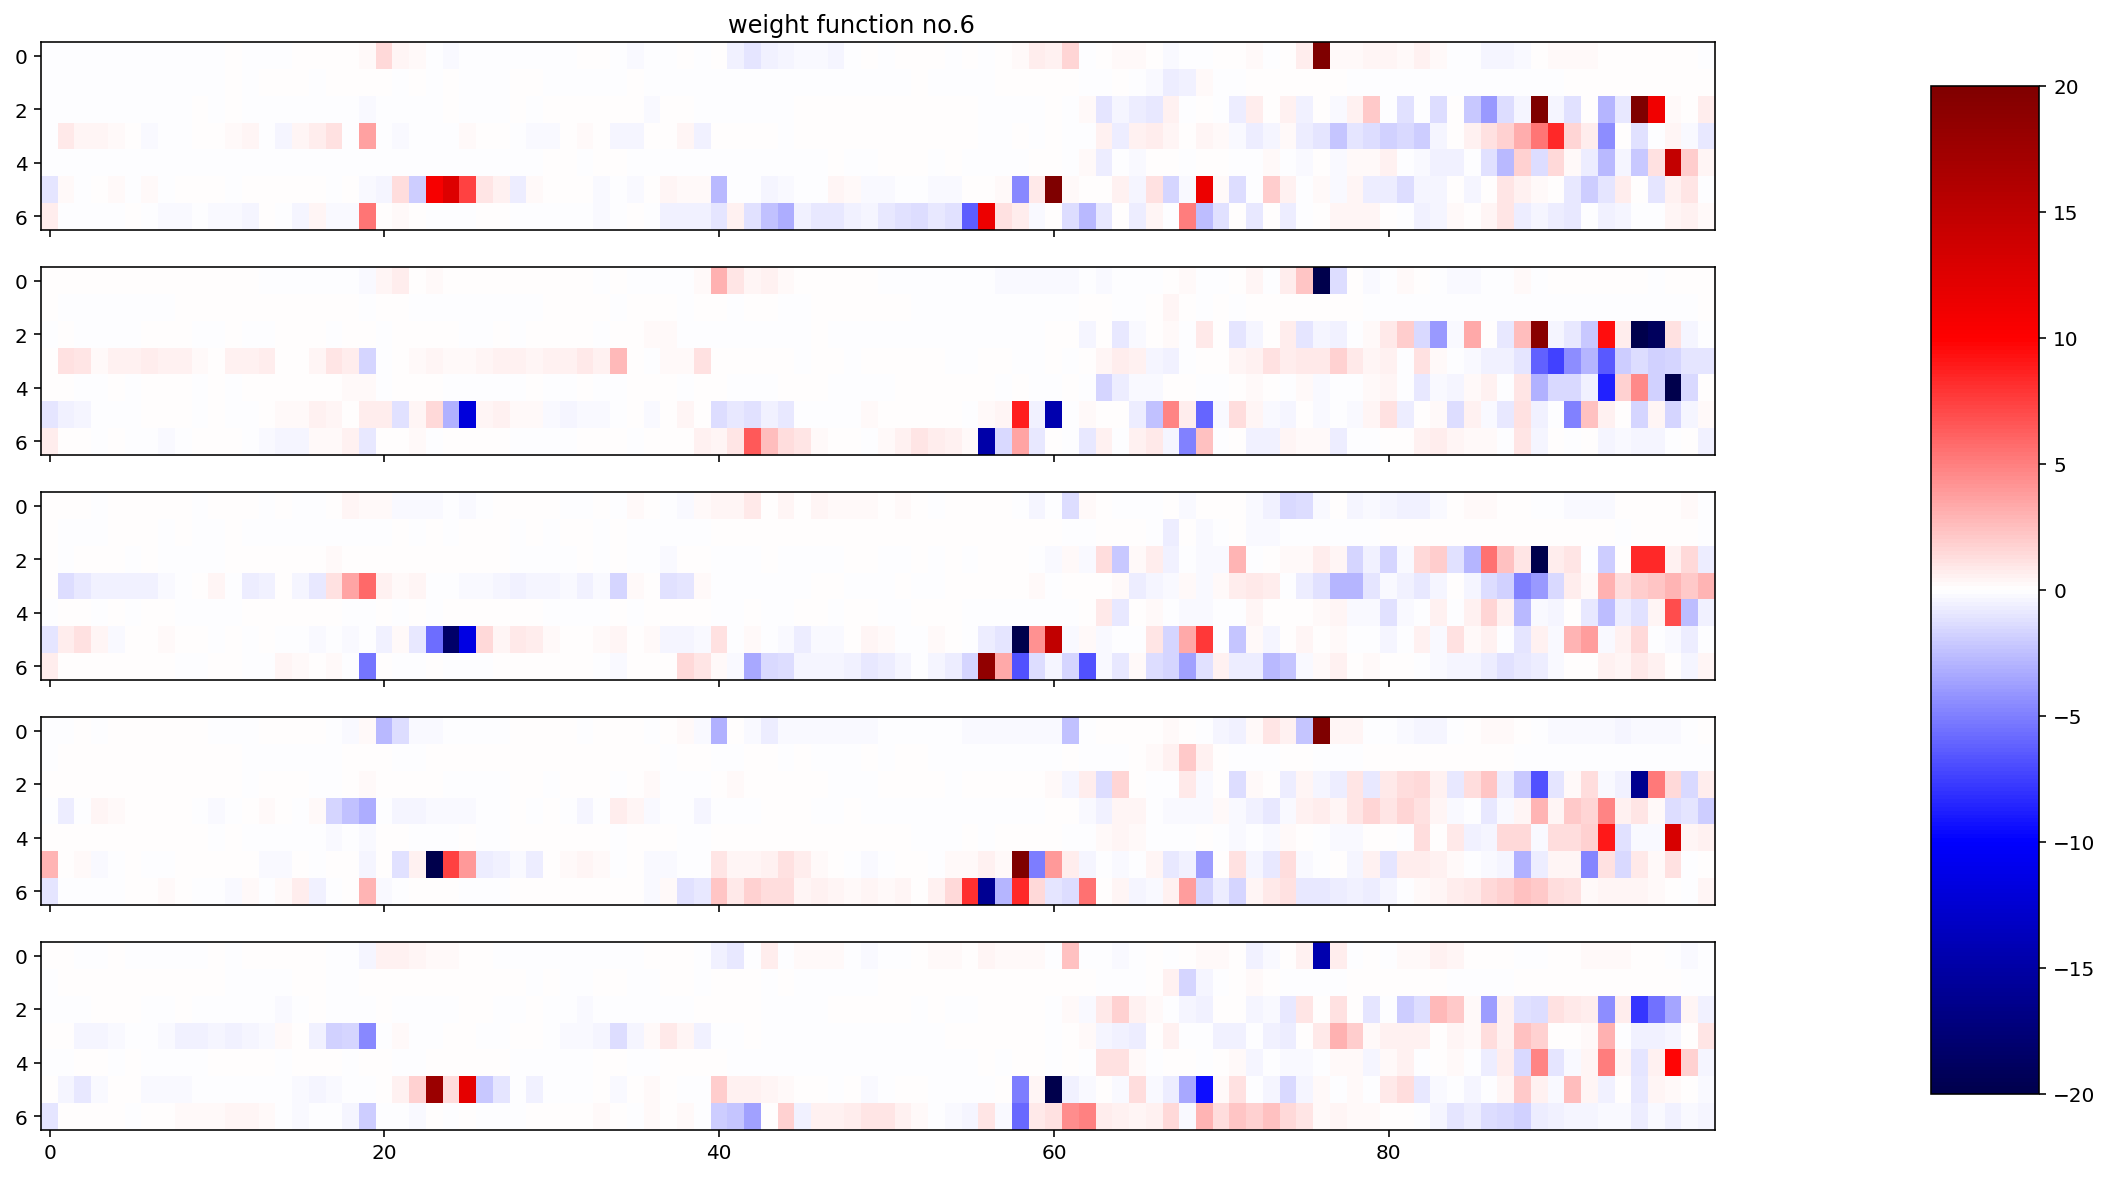

In [95]:
for i in range(7):
    fig, axes = plt.subplots(nrows=5, ncols=1, sharex=True)
    fig.set_figheight(10)
    fig.set_figwidth(15)
    fig.suptitle('weight function no.%i'%(i),y=0.9)
    for j,ax in enumerate(axes.flat):
        im = ax.imshow(files[i][names[j]]/means_weight[i]-1,cmap='seismic',vmin=-20,vmax=20,aspect='auto')
    cbar_ax = fig.add_axes([1., 0.15, 0.05, 0.7])
    fig.colorbar(im, cax=cbar_ax)

    plt.show()

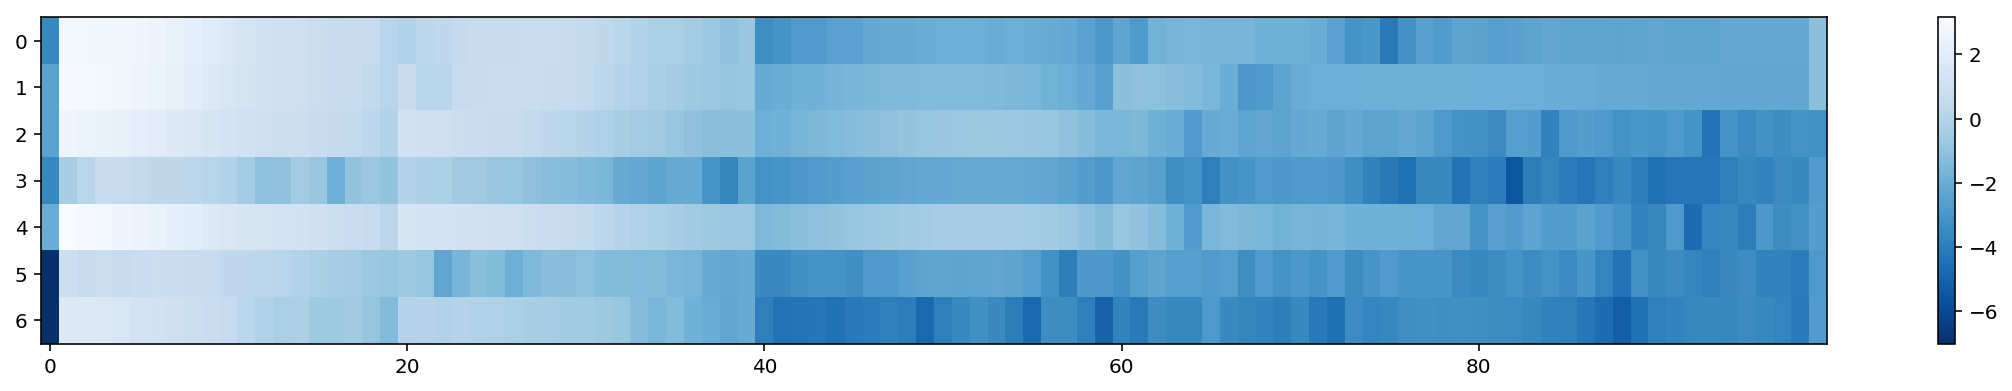

In [116]:
plt.figure(figsize=(20,3))
plt.imshow(np.log10(np.abs(files[3][names[2]])),cmap='Blues_r',aspect='auto',vmin=-7)
plt.colorbar()

In [117]:
fid_20p0 = np.load('Run_061218/bolp_20p0_0.npz')

def calc_cov(covjk,func_real):
    return np.mean(covjk,axis=0)+np.cov(func_real.T)

cov = calc_cov(fid_20p0['func_all_cov'],fid_20p0['func_all'])

### Covariance matrix normalized by diagonal terms (correlation), 100*100

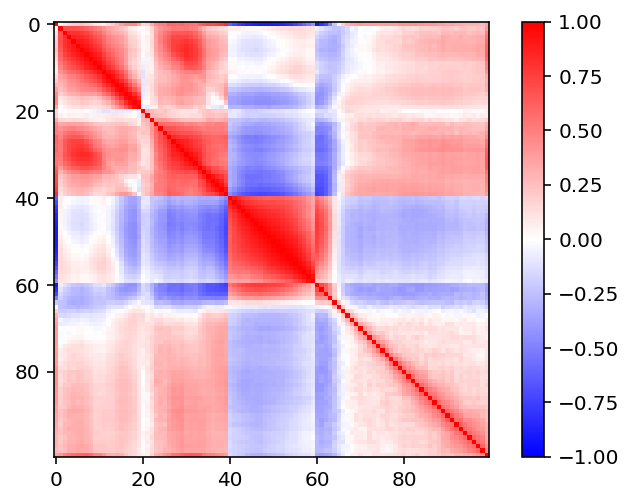

In [118]:
plt.imshow((cov/np.sqrt(cov.diagonal())).T/np.sqrt(cov.diagonal()),\
                   vmin=-1, vmax=1, cmap='bwr')
plt.colorbar()

### Eigenvalues of covariance matrix

In [119]:
np.linalg.eigvals(cov)

array([  1.02172359e+03,   1.37457142e+02,   6.37893036e+01,
         3.28100902e+01,   2.14203191e+01,   1.78054694e+01,
         9.54958520e+00,   5.60259141e+00,   3.64088129e+00,
         1.92957217e+00,   1.19491519e+00,   8.62974813e-01,
         7.64139628e-01,   5.51280823e-01,   3.88416993e-01,
         3.10068183e-01,   2.23477084e-01,   2.00097045e-01,
         1.40923709e-01,   1.04506450e-01,   9.62972139e-02,
         6.85441938e-02,   4.84227872e-02,   4.70499571e-02,
         3.24495692e-02,   2.04505260e-02,   1.14481648e-02,
         7.93383956e-03,   4.07284448e-03,   3.49362758e-03,
         2.27576091e-03,   1.45031447e-03,   9.88667669e-04,
         8.41239985e-04,   6.23133083e-04,   4.38686566e-04,
         2.86264329e-04,   1.70713060e-04,   1.27038395e-04,
         6.80279659e-05,   1.07693918e-05,   4.06418221e-06,
         3.62784595e-06,   3.48993638e-06,   3.06207597e-06,
         2.85853351e-06,   2.38329907e-06,   2.27259873e-06,
         2.05748776e-06,

In [120]:
order = np.argsort(-np.linalg.eig(cov)[0])

In [136]:
np.linalg.eig(cov)[0][order][:40]

array([  1.02172359e+03,   1.37457142e+02,   6.37893036e+01,
         3.28100902e+01,   2.14203191e+01,   1.78054694e+01,
         9.54958520e+00,   5.60259141e+00,   3.64088129e+00,
         1.92957217e+00,   1.19491519e+00,   8.62974813e-01,
         7.64139628e-01,   5.51280823e-01,   3.88416993e-01,
         3.10068183e-01,   2.23477084e-01,   2.00097045e-01,
         1.40923709e-01,   1.04506450e-01,   9.62972139e-02,
         6.85441938e-02,   4.84227872e-02,   4.70499571e-02,
         3.24495692e-02,   2.04505260e-02,   1.14481648e-02,
         7.93383956e-03,   4.07284448e-03,   3.49362758e-03,
         2.27576091e-03,   1.45031447e-03,   9.88667669e-04,
         8.41239985e-04,   6.23133083e-04,   4.38686566e-04,
         2.86264329e-04,   1.70713060e-04,   1.27038395e-04,
         6.80279659e-05])

In [152]:
np.linalg.eig(cov)[1][order][0]

array([  6.02634608e-07,   2.40298371e-06,   2.88550573e-06,
         1.00039832e-06,   6.56089386e-06,  -1.11288672e-05,
        -8.01918574e-06,  -5.33941625e-06,   5.12006175e-06,
         1.67460329e-05,  -2.39832786e-05,   3.21618802e-05,
        -1.26200824e-05,   1.20971193e-06,   5.65395988e-06,
         7.42550832e-05,   1.00082997e-05,   1.11927170e-04,
        -3.07925084e-05,  -1.05594895e-04,  -8.37993348e-05,
         5.01464290e-05,  -1.15396799e-04,   1.31943134e-04,
         2.18754299e-04,   1.77440061e-04,  -1.65350911e-04,
         6.42916413e-05,  -1.08260487e-05,   1.23296742e-04,
         2.17530658e-04,  -2.13163459e-05,   3.17665226e-04,
        -2.36302795e-04,  -1.56786408e-04,   1.29832570e-04,
         4.35157768e-04,   1.12363865e-03,   5.31621398e-04,
         3.29369215e-03,  -4.36190100e-03,  -4.38415868e-03,
         3.30902967e-03,  -1.47945209e-03,   3.47626689e-03,
        -1.13614091e-03,  -6.30730757e-04,   4.15793883e-03,
         1.79232741e-04,

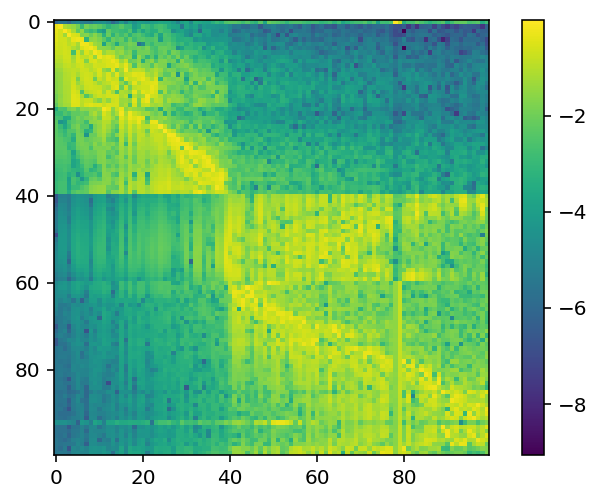

In [127]:
plt.imshow(np.log10(np.abs(np.linalg.eig(cov)[1][order])))
plt.colorbar()

In [133]:
np.linalg.eig(cov)[1][order][0][78:80]

array([ 0.98412436, -0.17595554])

In [140]:
idx = np.arange(42)
idx[-1] = 79
idx[-2] = 78
idx

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 78, 79])

In [144]:
cov_cut = cov[idx][:,idx]

In [146]:
np.linalg.eigvals(cov_cut)

array([  1.02172359e+03,   1.37457137e+02,   6.37893002e+01,
         3.28100900e+01,   2.14203097e+01,   1.78054399e+01,
         9.54957655e+00,   5.60258682e+00,   3.64088056e+00,
         1.92956531e+00,   1.19490451e+00,   8.62963837e-01,
         7.64138944e-01,   5.51280404e-01,   3.88416123e-01,
         3.10053843e-01,   2.23476790e-01,   2.00076021e-01,
         1.40921031e-01,   1.04496527e-01,   9.62928964e-02,
         6.85395097e-02,   4.84135397e-02,   4.70436717e-02,
         3.24343897e-02,   2.04447428e-02,   1.14459522e-02,
         7.93357654e-03,   4.07272234e-03,   3.49307469e-03,
         2.27321601e-03,   1.45021017e-03,   9.84276200e-04,
         8.36713022e-04,   6.22942413e-04,   4.38015722e-04,
         2.86027323e-04,   1.67560540e-04,   1.25993251e-04,
         2.04377858e-09,   4.63466812e-07,   1.68271066e-07])

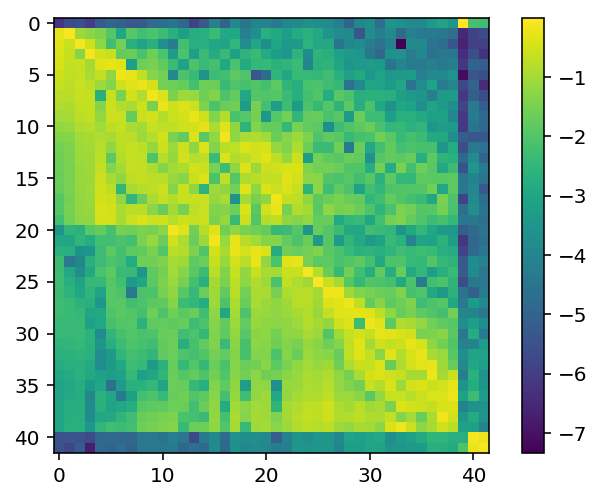

In [147]:
plt.imshow(np.log10(np.abs(np.linalg.eig(cov_cut)[1])))
plt.colorbar()

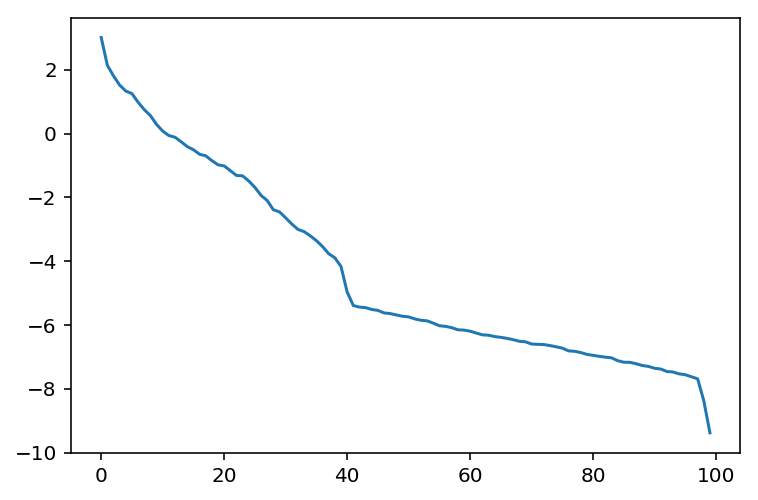

In [151]:
plt.plot(np.log10(np.abs(np.linalg.eig(cov)[0][order])))

In [155]:
a, b, c = np.linalg.svd(cov)

In [180]:
b

array([  1.02172359e+03,   1.37457142e+02,   6.37893036e+01,
         3.28100902e+01,   2.14203191e+01,   1.78054694e+01,
         9.54958520e+00,   5.60259141e+00,   3.64088129e+00,
         1.92957217e+00,   1.19491519e+00,   8.62974813e-01,
         7.64139628e-01,   5.51280823e-01,   3.88416993e-01,
         3.10068183e-01,   2.23477084e-01,   2.00097045e-01,
         1.40923709e-01,   1.04506450e-01,   9.62972139e-02,
         6.85441938e-02,   4.84227872e-02,   4.70499571e-02,
         3.24495692e-02,   2.04505260e-02,   1.14481648e-02,
         7.93383956e-03,   4.07284448e-03,   3.49362758e-03,
         2.27576091e-03,   1.45031447e-03,   9.88667669e-04,
         8.41239985e-04,   6.23133083e-04,   4.38686566e-04,
         2.86264329e-04,   1.70713060e-04,   1.27038395e-04,
         6.80279659e-05,   1.07693918e-05,   4.06418221e-06,
         3.62784595e-06,   3.48993638e-06,   3.06207597e-06,
         2.85853351e-06,   2.38329907e-06,   2.27259873e-06,
         2.05748776e-06,

In [162]:
np.dot(np.dot(a,np.diag(b)),c)/cov

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ..., 
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]])

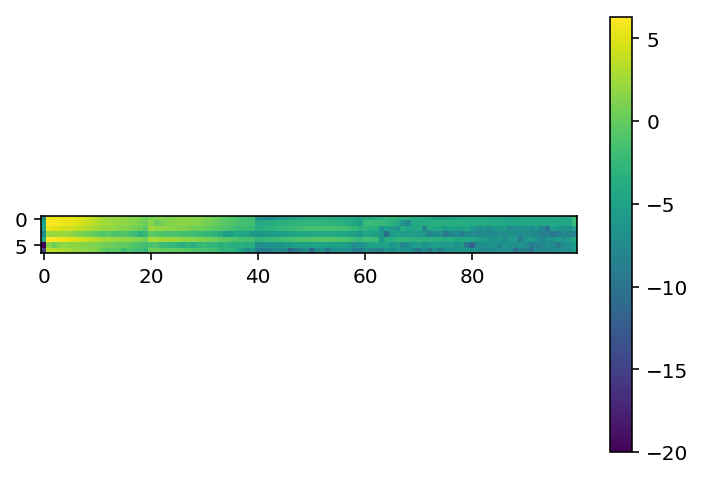

In [179]:
plt.imshow(2*np.log10(np.abs(dfdp_bisq[names[0]])),vmin=-20)
plt.colorbar()

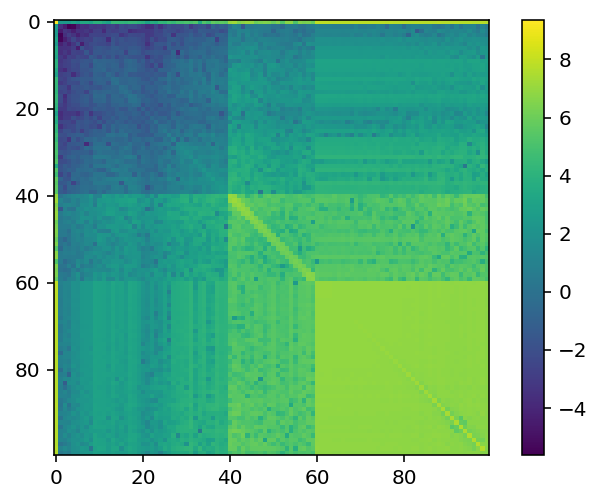

In [190]:
plt.imshow(np.log10(np.abs((np.linalg.pinv(cov,rcond=1e-9)-np.linalg.inv(cov)))))
plt.colorbar()

In [164]:
np.linalg.inv(cov)

array([[  2.33491434e+09,   3.76022955e+02,   2.29324366e+02, ...,
          4.27473586e+07,   5.86402994e+07,   4.27737332e+07],
       [  3.76022955e+02,   6.64436151e-03,  -1.29425569e-03, ...,
          1.28376524e+00,   1.17247966e+01,   1.19581688e-01],
       [  2.29324366e+02,  -1.29425569e-03,   1.48565071e-02, ...,
          4.30075680e+00,   3.94813229e+01,   5.33783632e+00],
       ..., 
       [  4.27473586e+07,   1.28376524e+00,   4.30075680e+00, ...,
          4.17500276e+07,  -5.34193434e+06,   4.98791832e+06],
       [  5.86402994e+07,   1.17247966e+01,   3.94813229e+01, ...,
         -5.34193434e+06,   4.32283282e+07,   4.41784044e+06],
       [  4.27737332e+07,   1.19581688e-01,   5.33783632e+00, ...,
          4.98791832e+06,   4.41784044e+06,   5.09647231e+06]])

In [169]:
fid_20p0['func_all'][0,20:40]

array([ 27.32783148,  21.85269048,  17.4158764 ,  13.79949888,
        11.1053906 ,   8.68970084,   7.10820734,   5.6485266 ,
         4.41922603,   3.47876657,   2.56960891,   1.93680017,
         1.37735763,   1.09113613,   0.8546221 ,   0.6961616 ,
         0.52490227,   0.46946238,   0.3649554 ,   0.36108759])

In [182]:
a = np.linalg.inv(np.dot(np.dot(dfdp_bisq[names[0]],np.linalg.inv(cov)),dfdp_bisq[names[0]].T))

In [183]:
a

array([[  2.78309787e-04,   1.60627806e-04,  -8.03044058e-05,
         -2.07943235e-03,  -2.68370449e-05,  -3.99480969e-06,
          7.89696513e-05],
       [  1.60627806e-04,   1.65008197e-04,  -3.49621448e-05,
         -1.69861498e-03,  -2.43807984e-05,   2.75122034e-04,
          6.42809509e-04],
       [ -8.03044058e-05,  -3.49621448e-05,   7.17139142e-04,
         -1.33642614e-03,   2.91951359e-04,   1.85642569e-04,
          4.01215956e-04],
       [ -2.07943235e-03,  -1.69861498e-03,  -1.33642614e-03,
          7.94056017e-02,  -1.81612894e-03,   2.53020339e-03,
         -2.69563011e-04],
       [ -2.68370449e-05,  -2.43807984e-05,   2.91951359e-04,
         -1.81612894e-03,   1.69485496e-04,  -8.54477643e-05,
         -1.76996227e-04],
       [ -3.99480969e-06,   2.75122034e-04,   1.85642569e-04,
          2.53020339e-03,  -8.54477643e-05,   1.24758660e-02,
          4.60887219e-03],
       [  7.89696513e-05,   6.42809509e-04,   4.01215956e-04,
         -2.69563011e-04,  -1.76

In [191]:
b = np.linalg.inv(np.dot(np.dot(dfdp_bisq[names[0]],np.linalg.pinv(cov,rcond=1e-9)),dfdp_bisq[names[0]].T))

In [192]:
b

array([[  4.79243357e-04,   2.65609271e-04,  -1.75179724e-04,
         -4.74816577e-03,  -2.89839933e-05,   3.91183784e-04,
         -2.78994144e-04],
       [  2.65609271e-04,   2.60593250e-04,  -1.51312577e-05,
         -4.02541496e-03,   1.33749744e-05,   1.25699694e-03,
          9.65114631e-04],
       [ -1.75179724e-04,  -1.51312577e-05,   1.63975076e-03,
         -4.94499766e-03,   7.39300204e-04,   2.04298636e-03,
          1.61050443e-03],
       [ -4.74816577e-03,  -4.02541496e-03,  -4.94499766e-03,
          1.73341489e-01,  -4.93384759e-03,  -2.33640831e-02,
         -3.25900122e-03],
       [ -2.89839933e-05,   1.33749744e-05,   7.39300204e-04,
         -4.93384759e-03,   4.21050776e-04,   9.87782317e-04,
          1.80688355e-04],
       [  3.91183784e-04,   1.25699694e-03,   2.04298636e-03,
         -2.33640831e-02,   9.87782317e-04,   3.89578356e-02,
          1.27545417e-02],
       [ -2.78994144e-04,   9.65114631e-04,   1.61050443e-03,
         -3.25900122e-03,   1.80

In [193]:
a/b

array([[ 0.58072748,  0.60475225,  0.45841153,  0.43794434,  0.92592641,
        -0.0102121 , -0.28305129],
       [ 0.60475225,  0.63320211,  2.3105908 ,  0.42197264, -1.82286693,
         0.21887248,  0.66604472],
       [ 0.45841153,  2.3105908 ,  0.43734643,  0.2702582 ,  0.39490231,
         0.09086824,  0.2491244 ],
       [ 0.43794434,  0.42197264,  0.2702582 ,  0.45808769,  0.36809587,
        -0.10829457,  0.08271338],
       [ 0.92592641, -1.82286693,  0.39490231,  0.36809587,  0.40252983,
        -0.08650465, -0.97956632],
       [-0.0102121 ,  0.21887248,  0.09086824, -0.10829457, -0.08650465,
         0.32024022,  0.36135146],
       [-0.28305129,  0.66604472,  0.2491244 ,  0.08271338, -0.97956632,
         0.36135146,  0.65529446]])

In [195]:
x = np.random.rand(100,3)*250

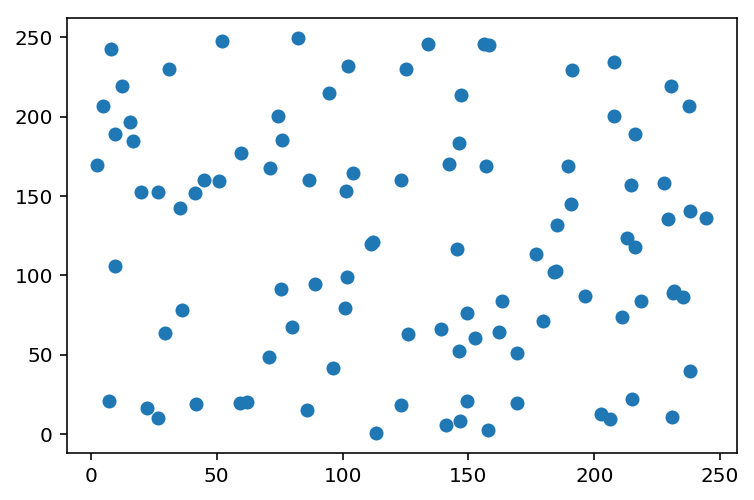

In [198]:
plt.scatter(x[:,1],x[:,2])